In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#Simulación

def simular(G):
    n = np.shape(G)[0]
    terminado = False
    disponibles = np.ones(shape=np.shape(G))
    proceso = [G.copy()]
    #print(np.all(G==0))
    while not terminado:
        disco_disponible = False
        while not disco_disponible:
            i = np.random.choice(range(n))
            j = np.random.choice(range(n))
            disco = G[i,j]
            #disco_disponible = disponible(G,i,j)
            disco_disponible = bool(disponibles[i,j])
            if disco_disponible:
                if np.random.uniform() <= 0.5:
                    #marcar como marcado y a los vecinos como no disponibles
                    G,disponibles = marcar(G,disponibles,i,j,n)
                    #print('({},{})'.format(i,j))
        terminado = np.all(disponibles==0)
        #print(G)
        proceso.append(G.copy())
    return proceso

def marcar(G, disponibles, i, j,n):
    v = 1
    G[i,j] = 1
    for i1 in range(max(0,i-1),min(n,i+1)):
        for j1 in range(max(0,j-1),min(n,j+1)):
            disponibles[i1,j1] = 0
    return G,disponibles



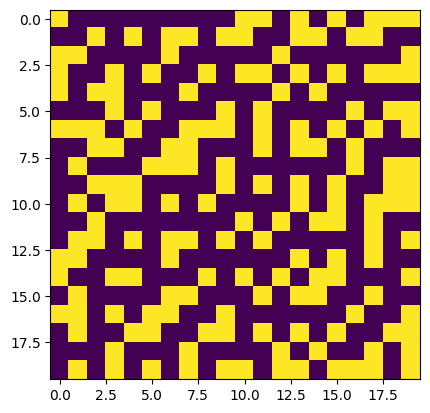

In [9]:
n = 20
G = np.zeros((n,n))

realizacionProceso = simular(G)
plt.imshow(realizacionProceso[-1])
plt.show()

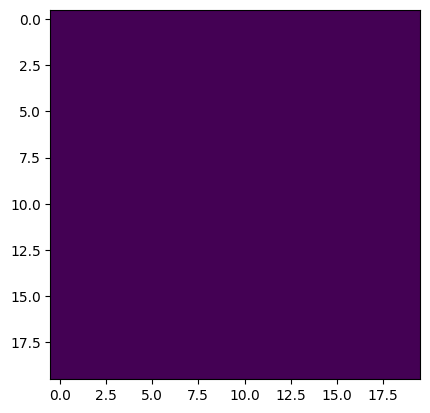

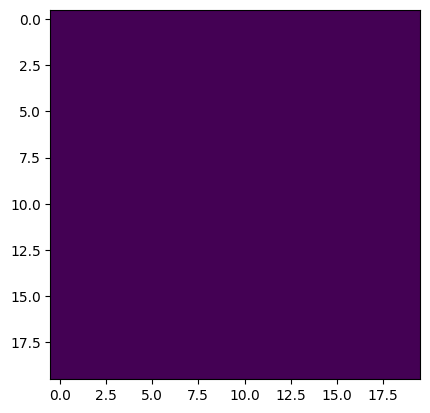

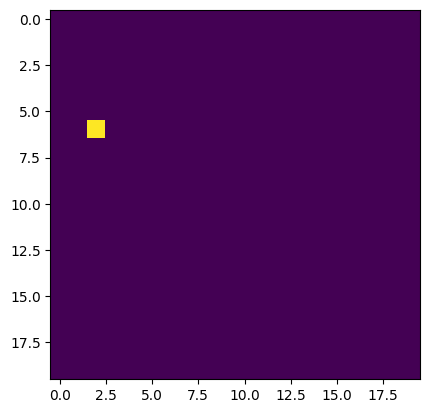

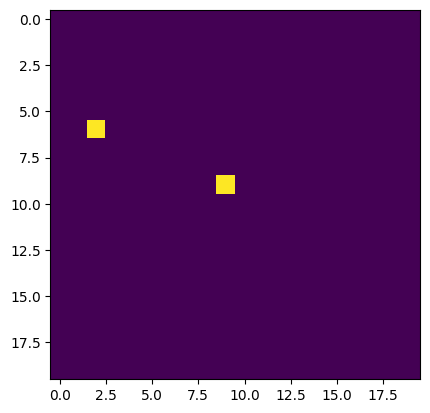

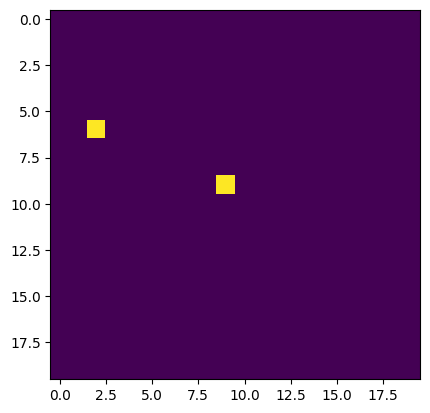

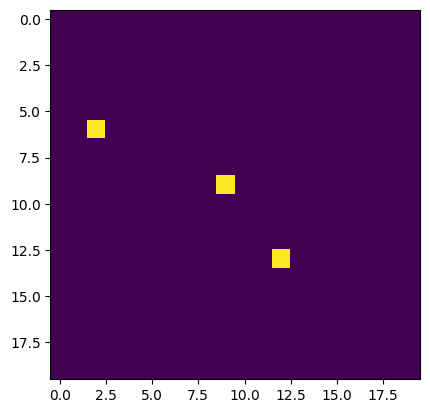

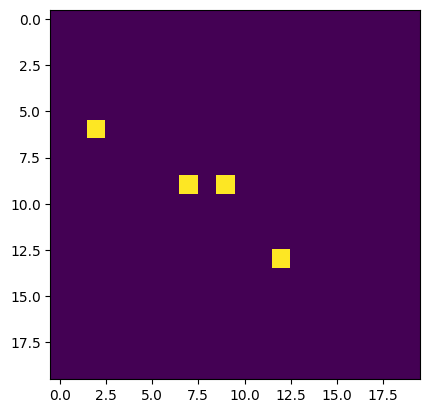

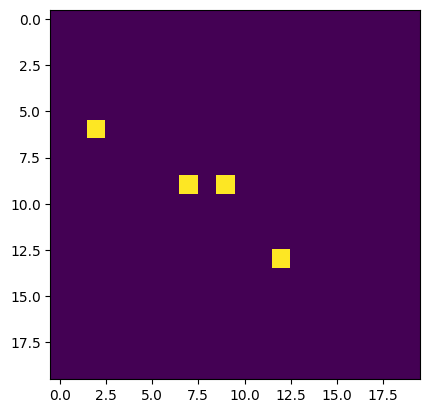

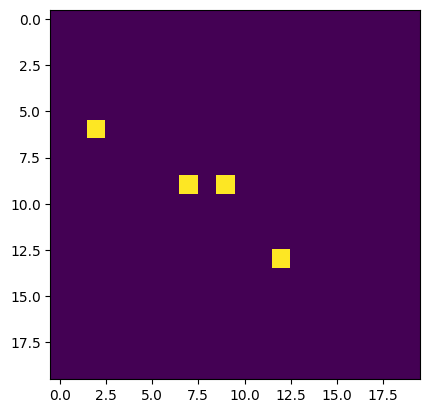

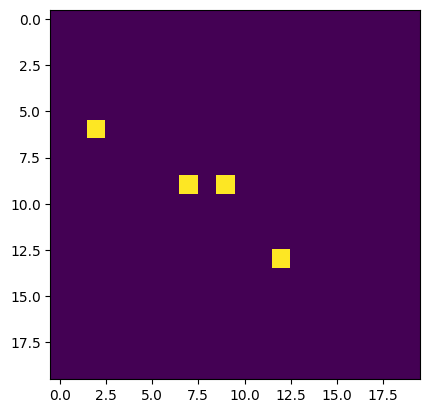

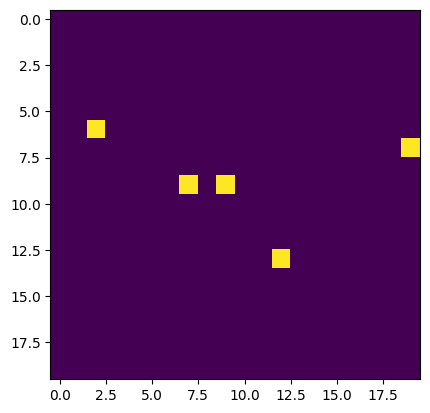

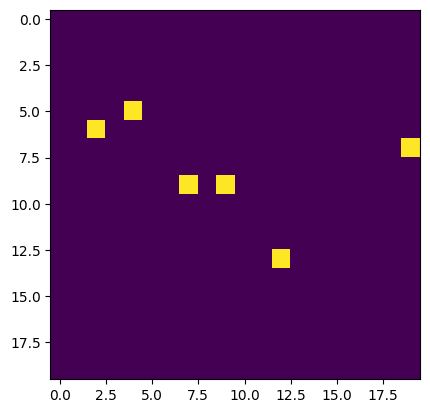

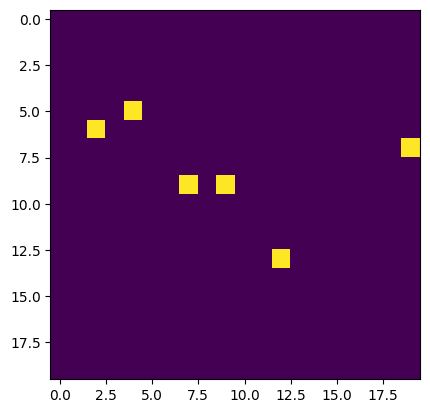

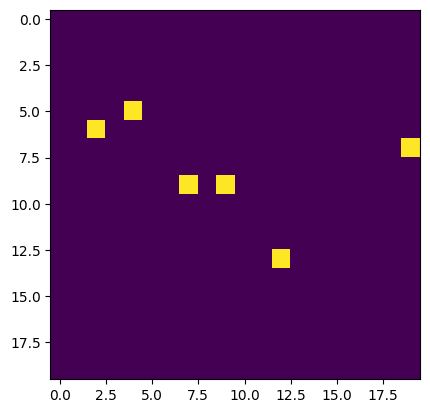

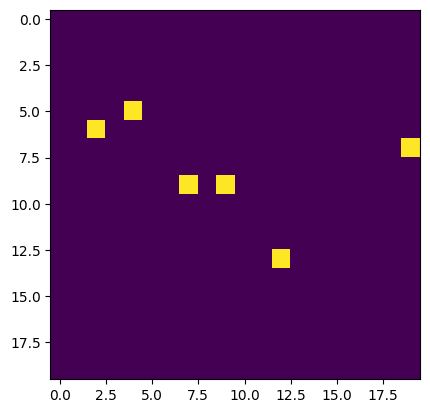

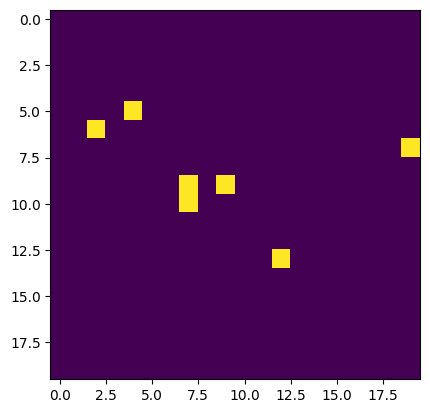

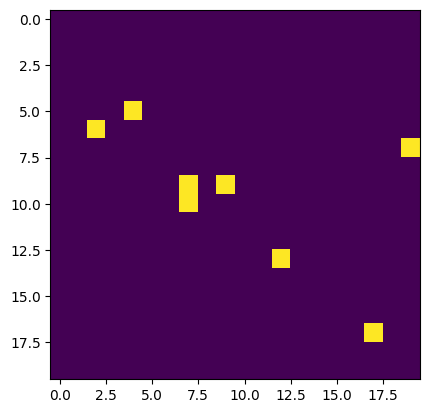

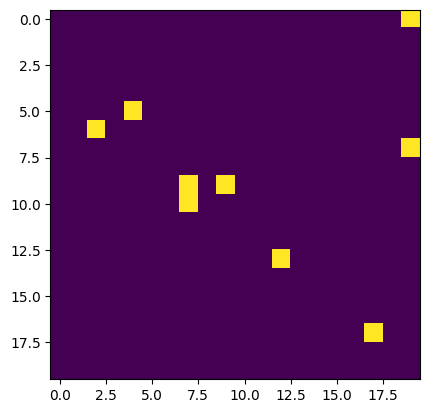

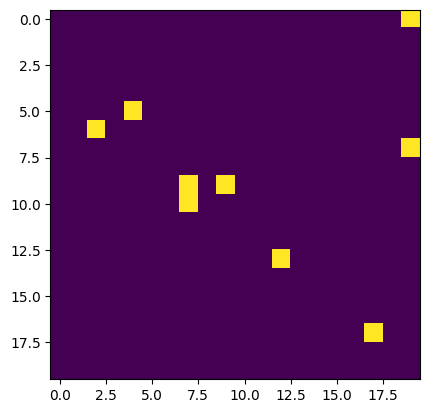

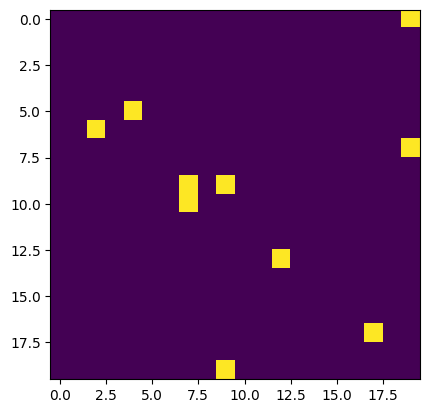

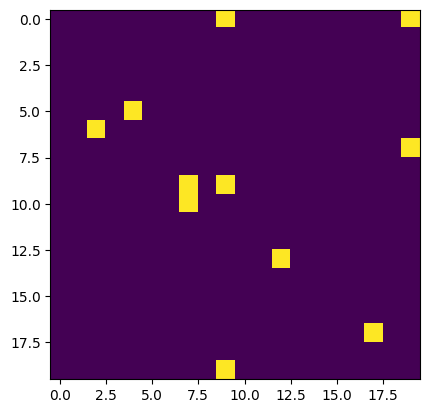

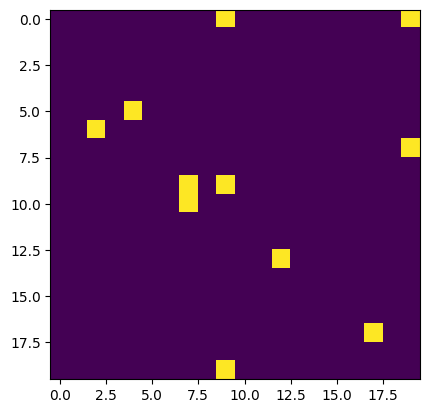

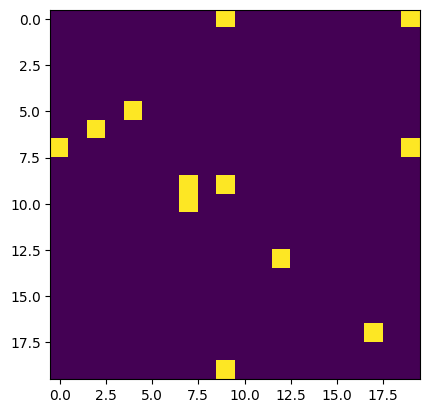

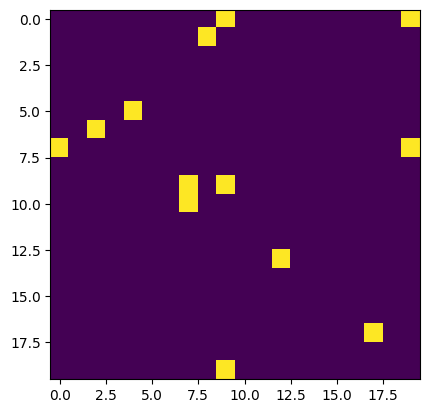

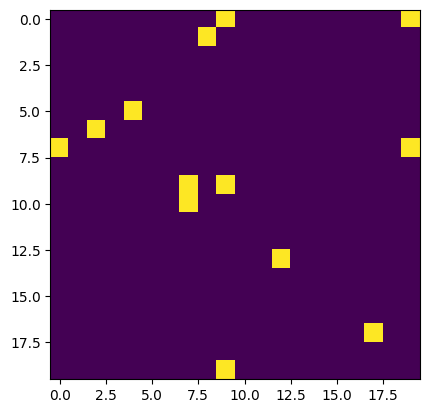

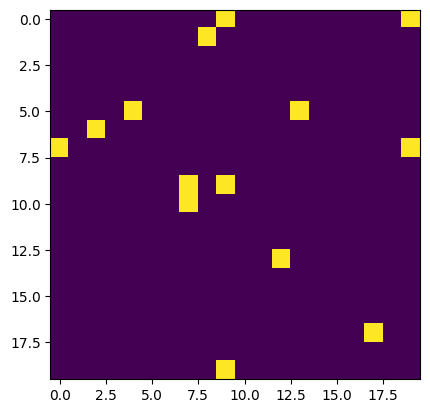

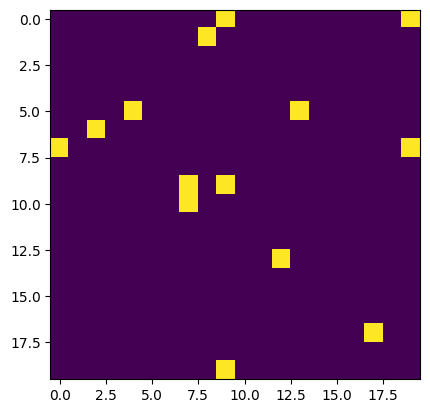

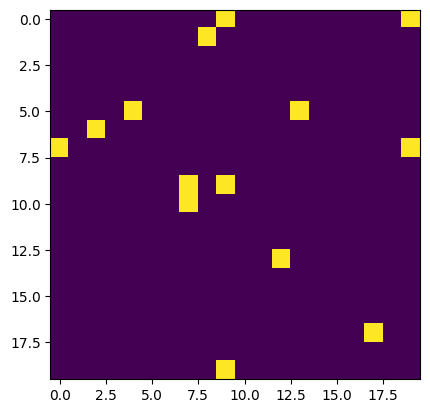

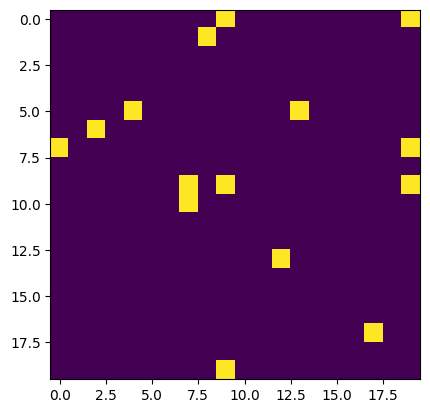

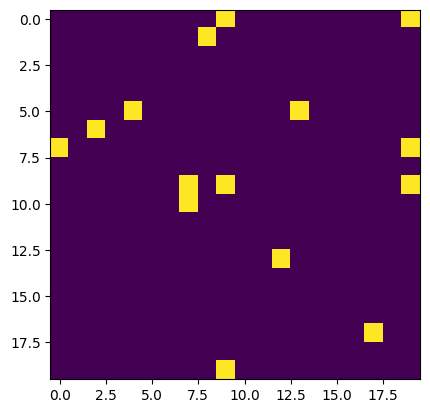

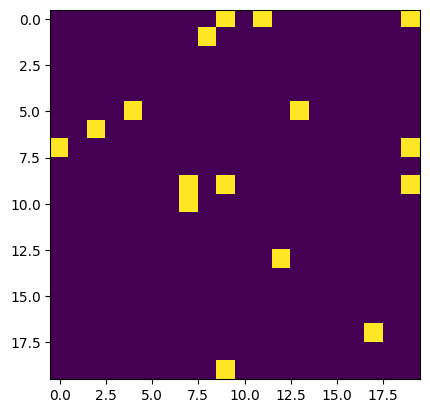

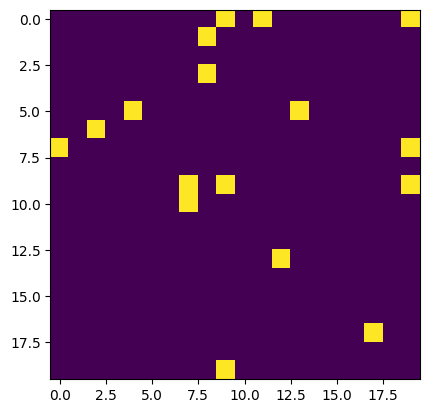

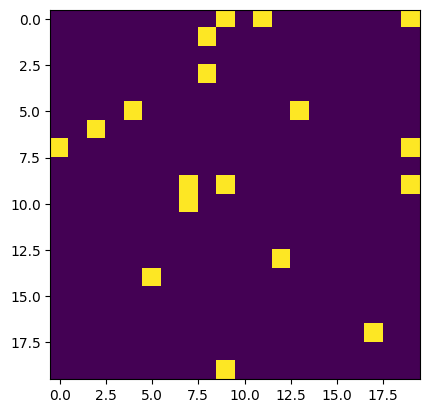

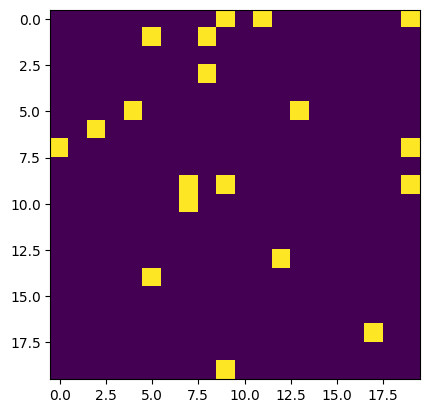

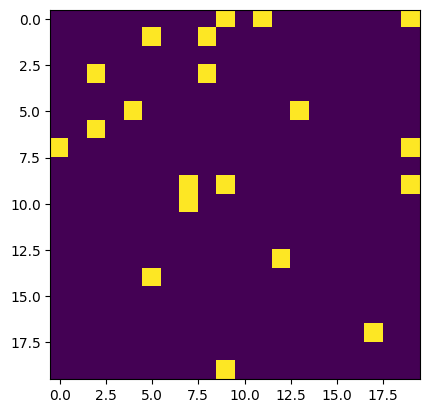

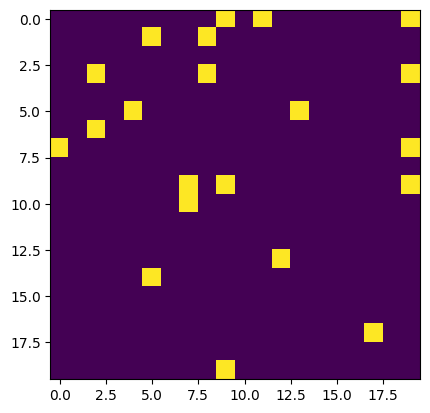

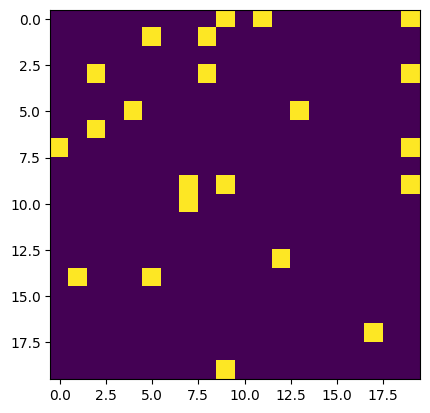

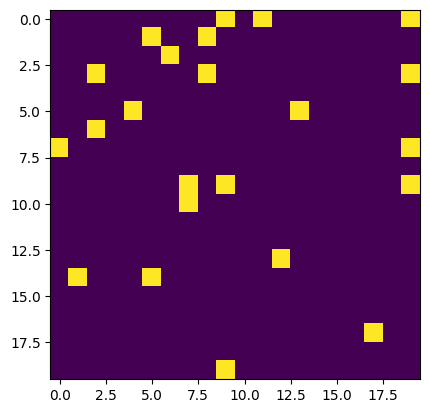

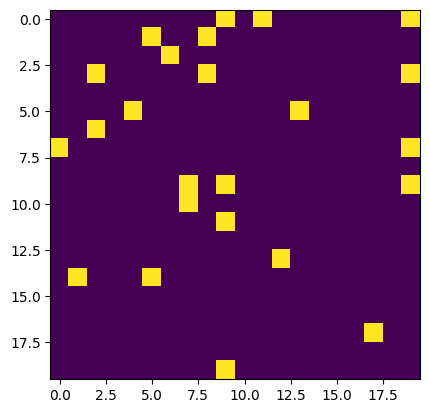

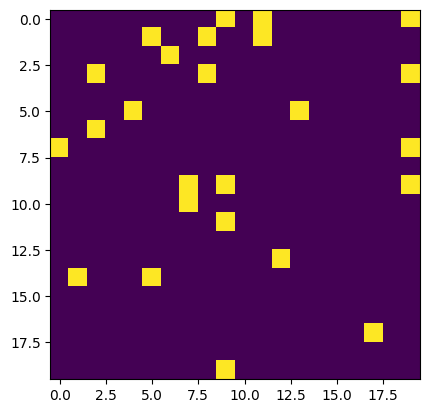

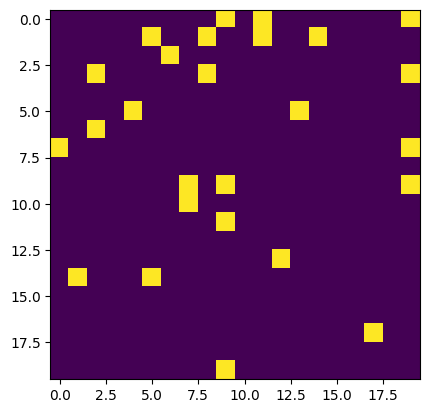

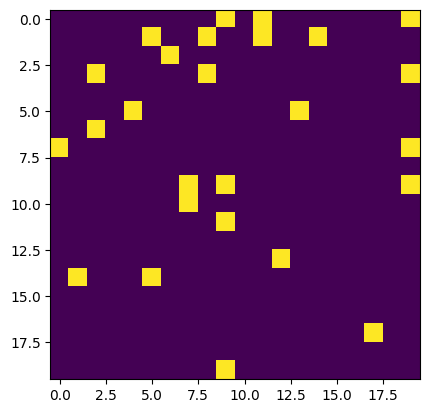

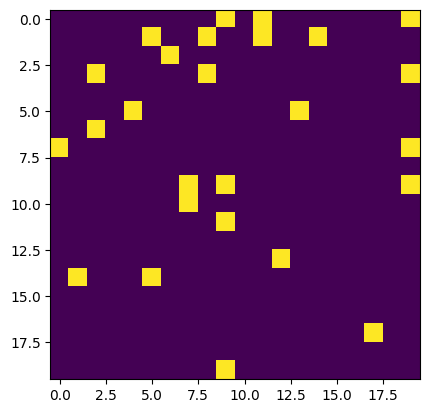

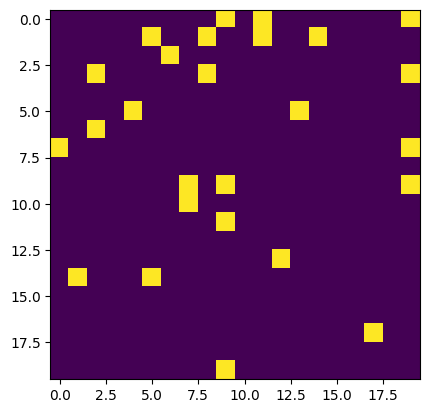

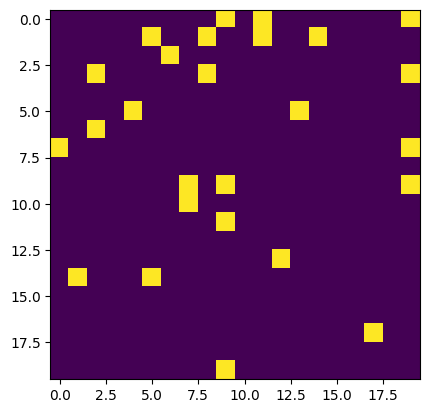

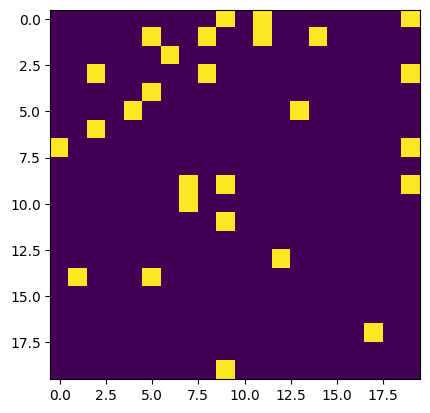

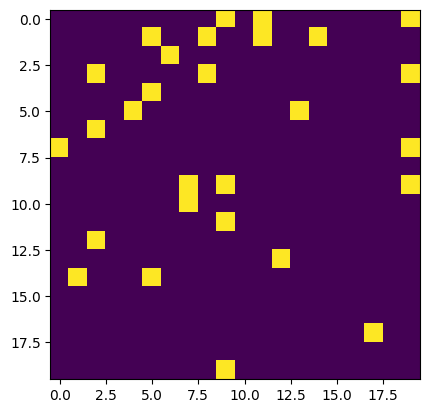

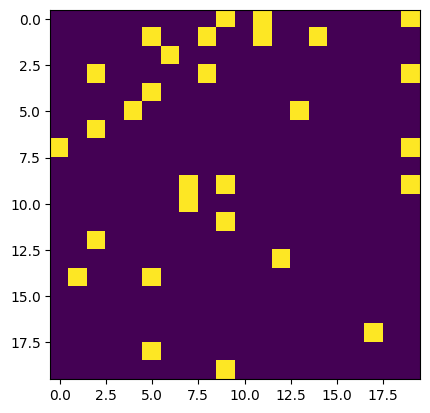

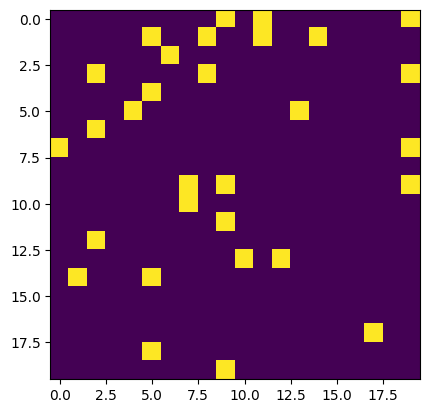

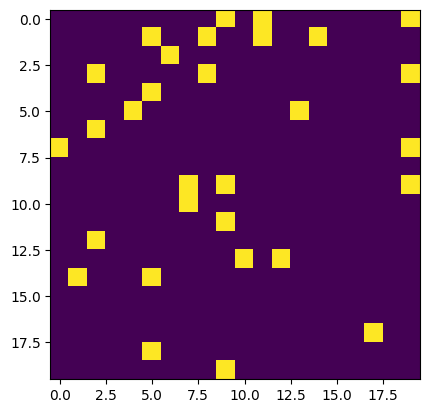

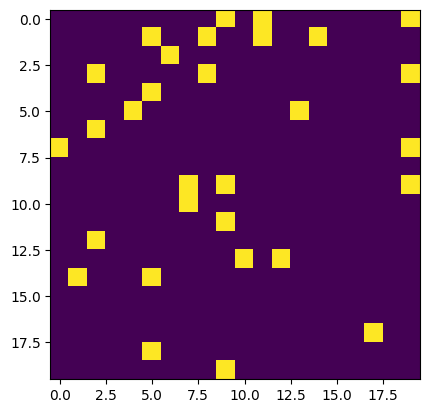

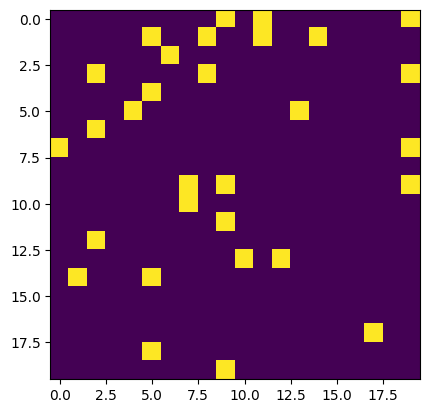

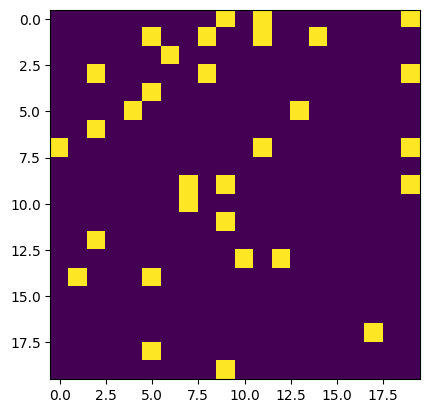

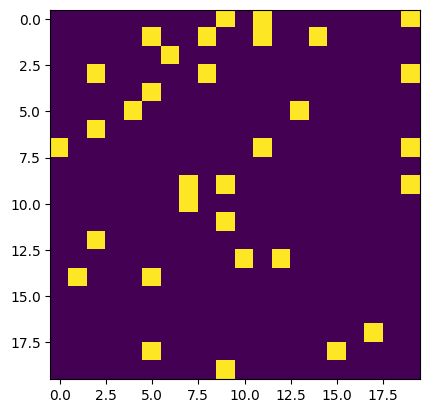

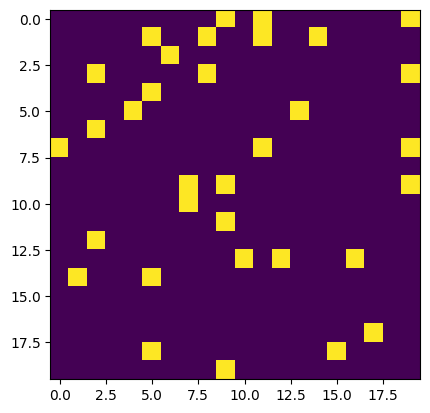

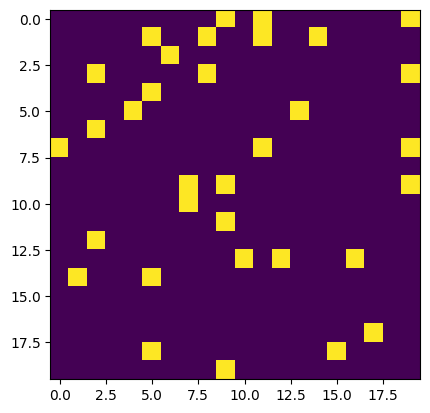

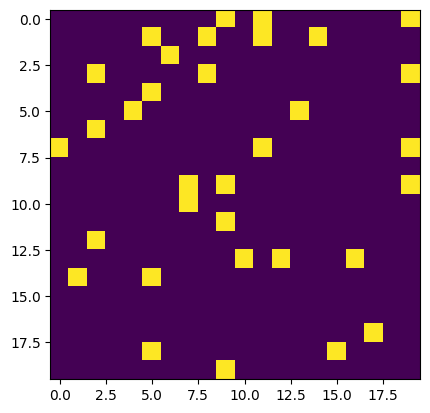

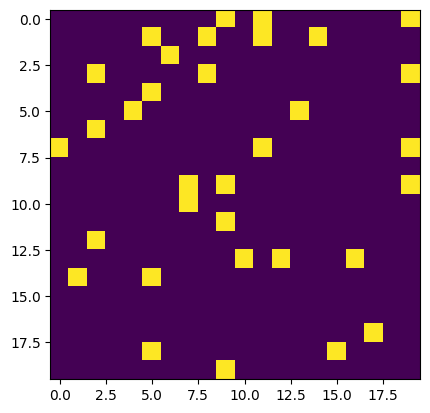

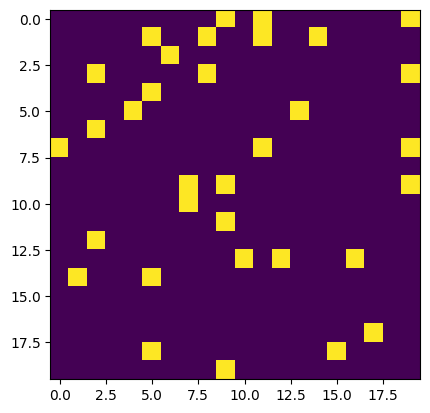

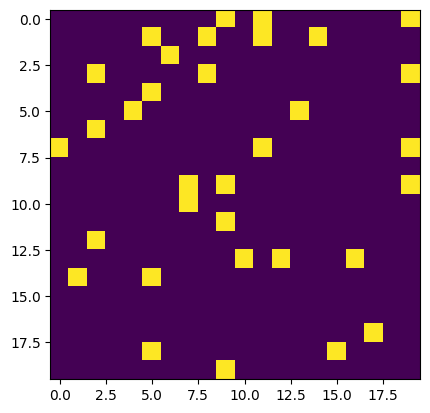

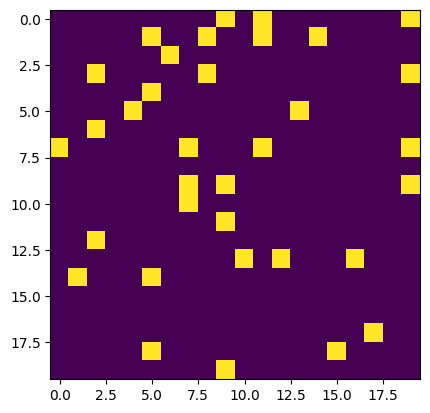

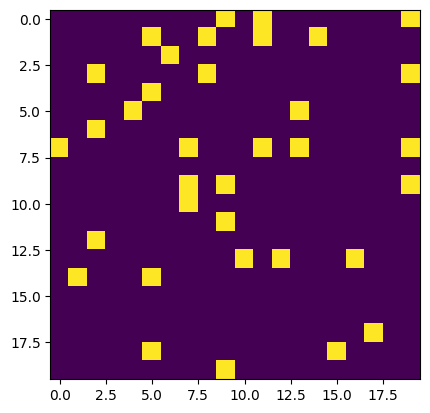

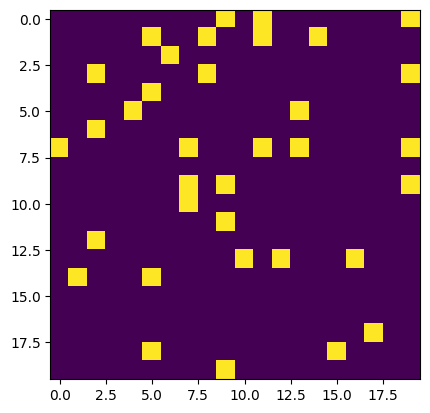

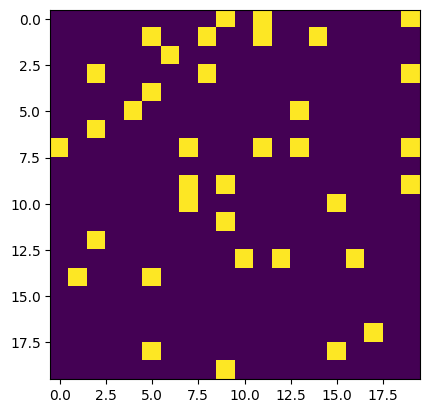

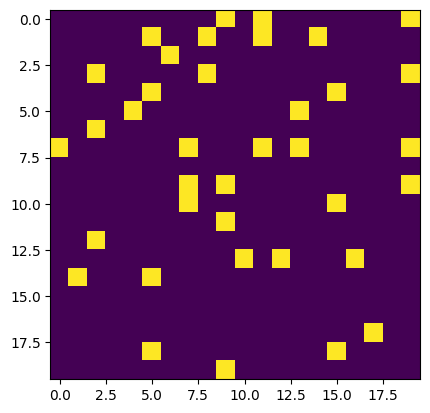

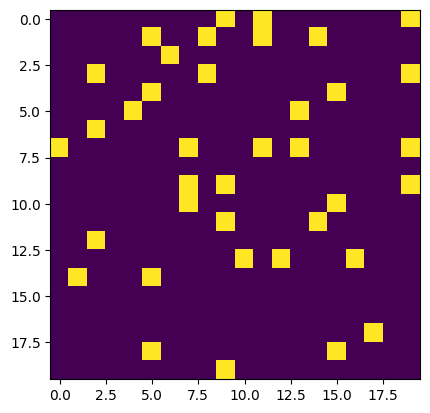

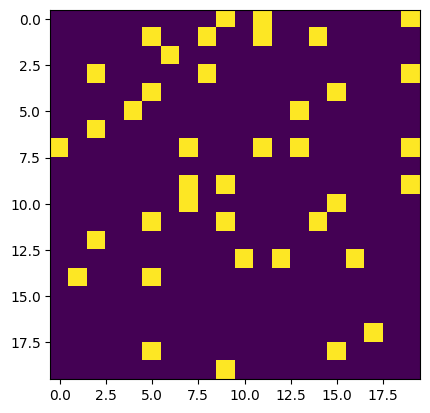

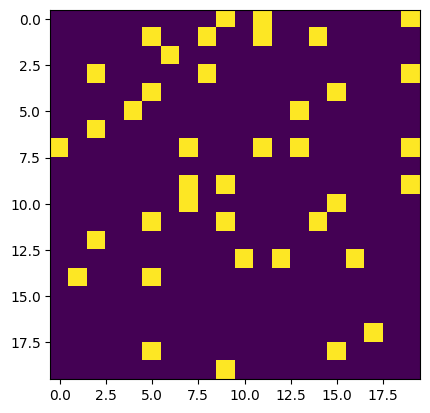

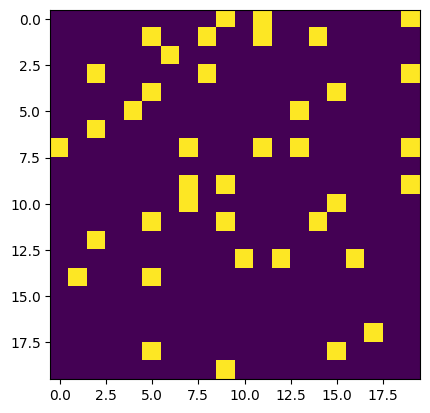

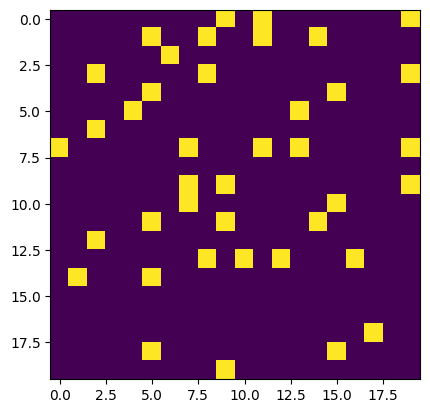

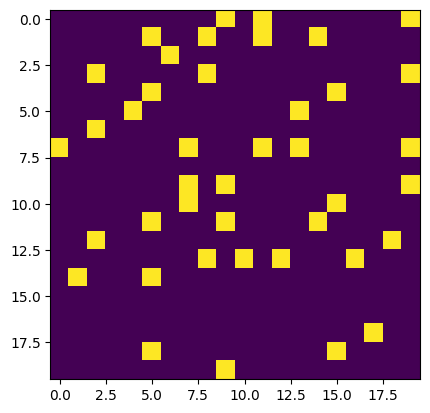

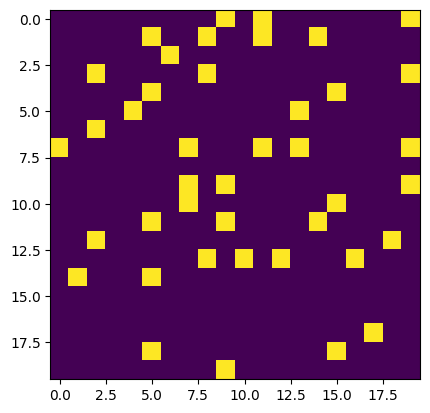

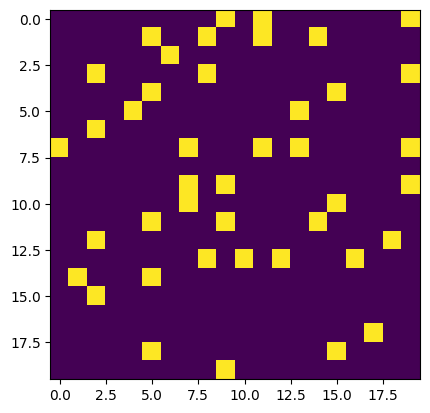

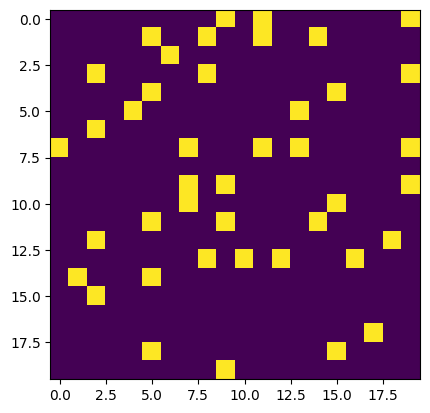

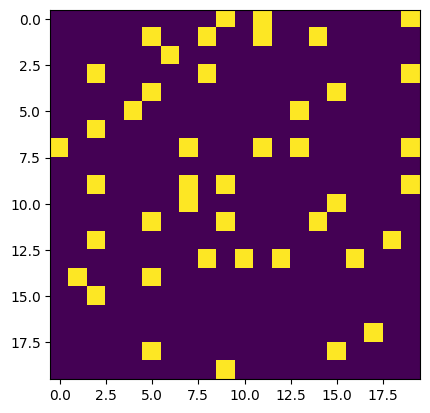

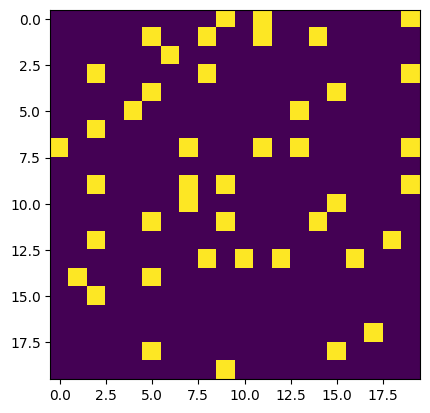

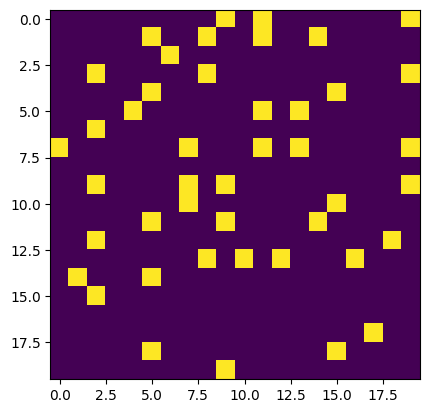

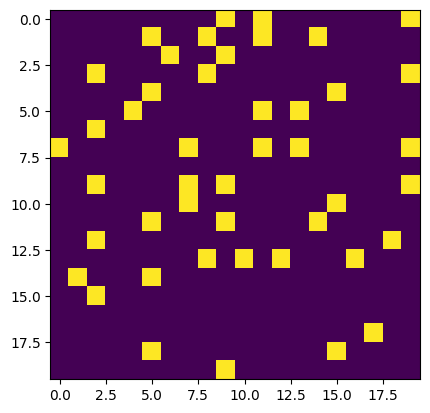

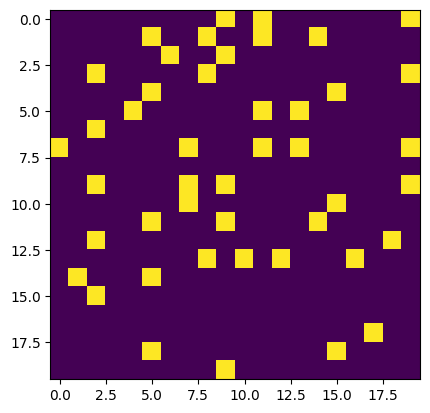

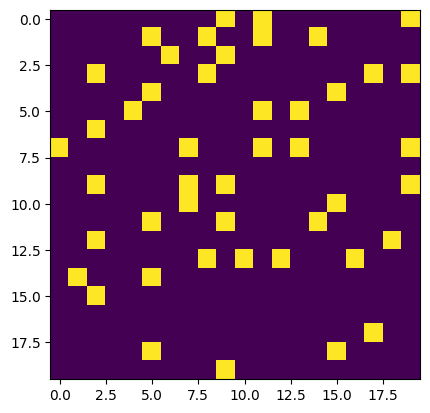

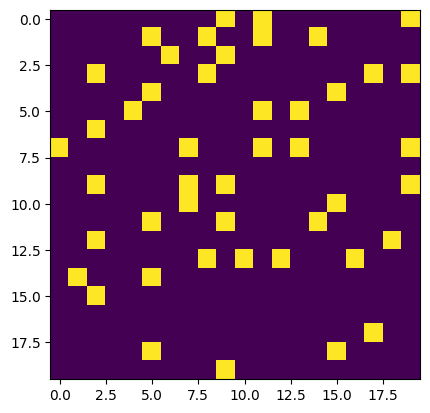

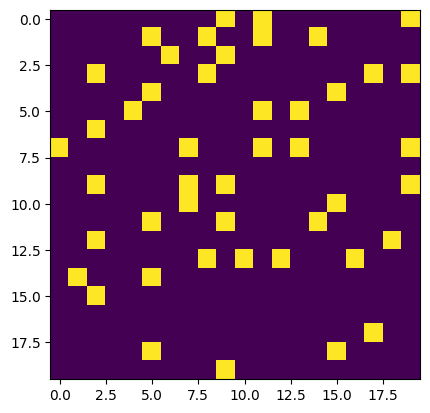

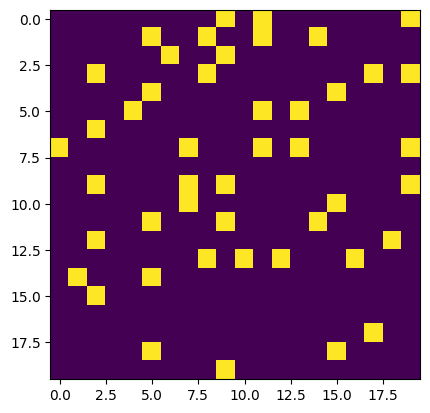

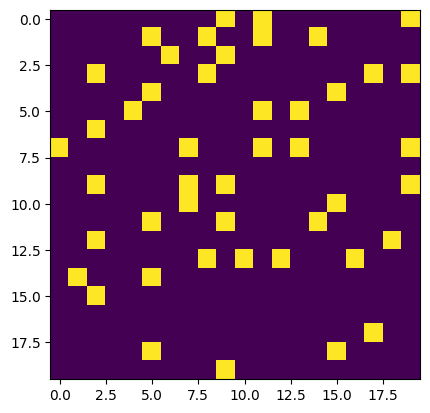

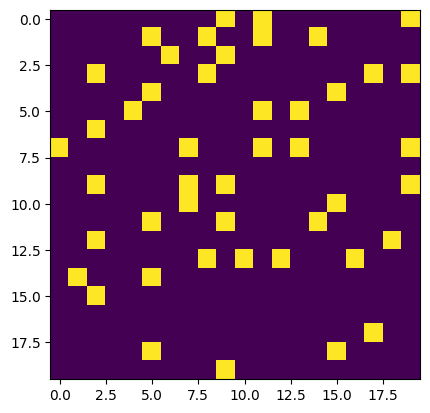

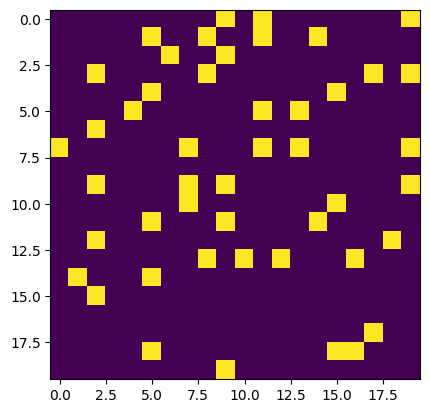

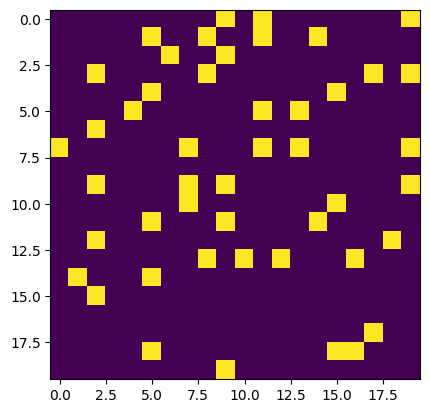

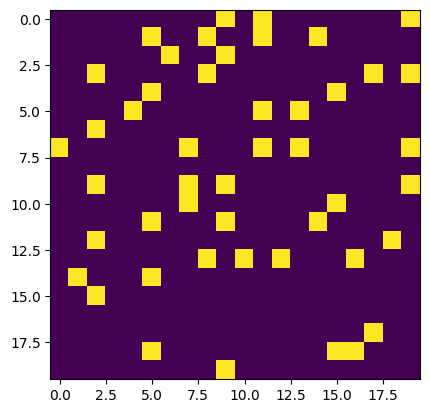

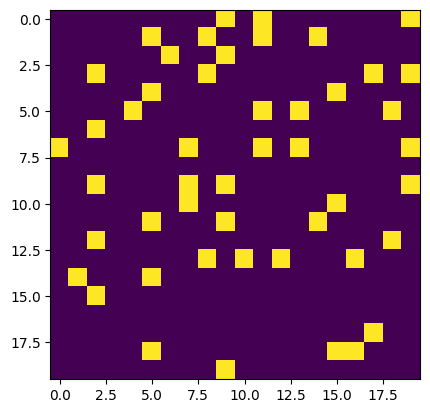

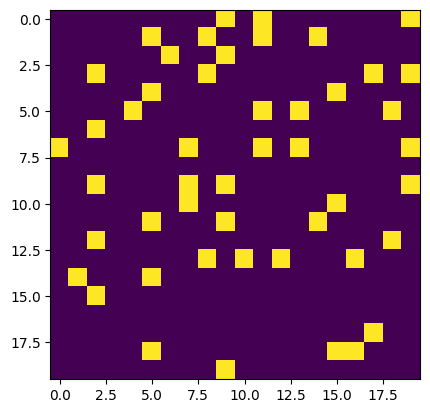

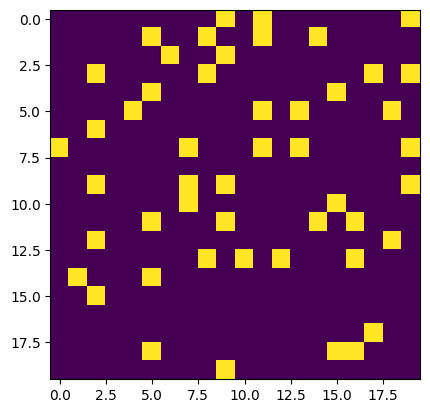

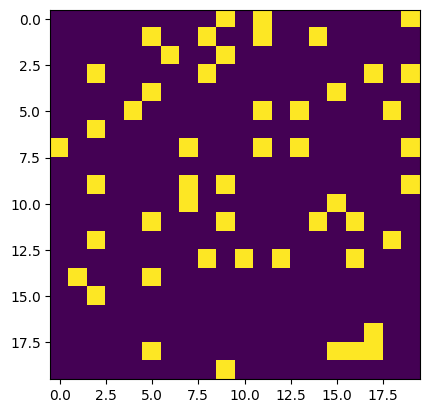

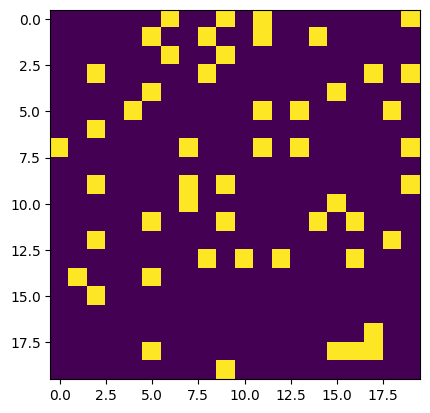

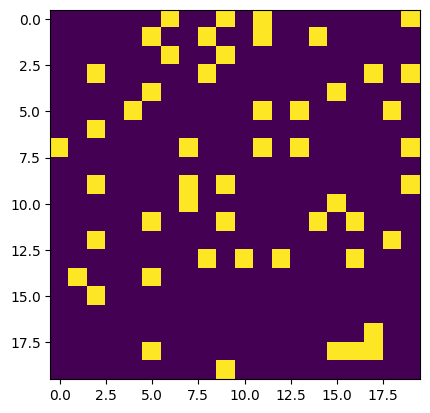

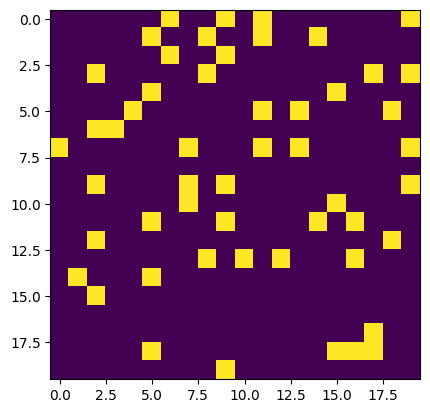

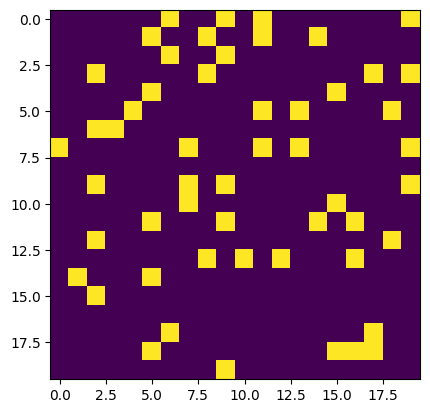

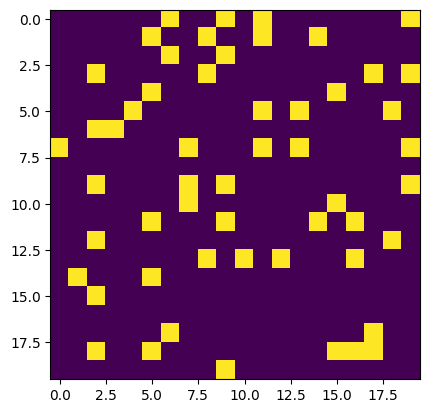

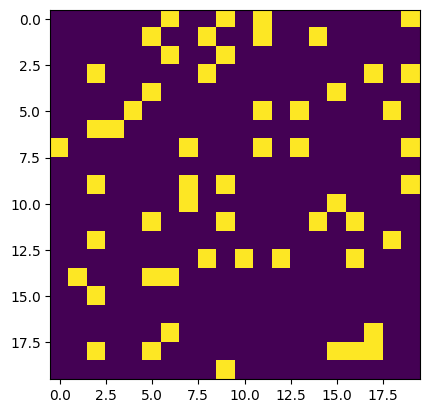

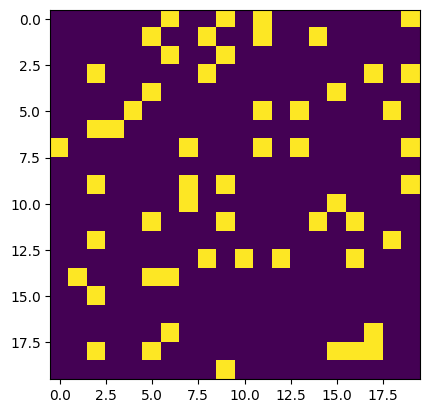

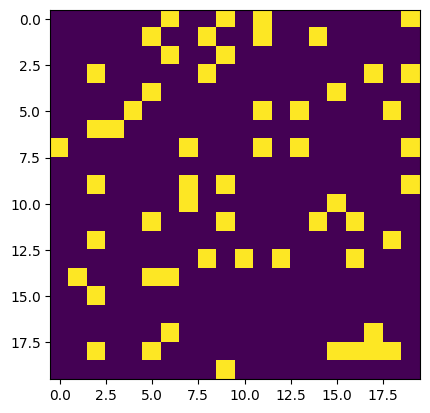

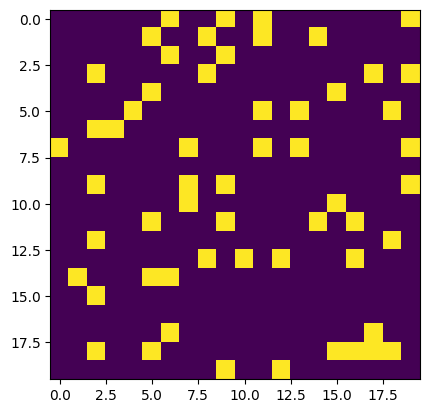

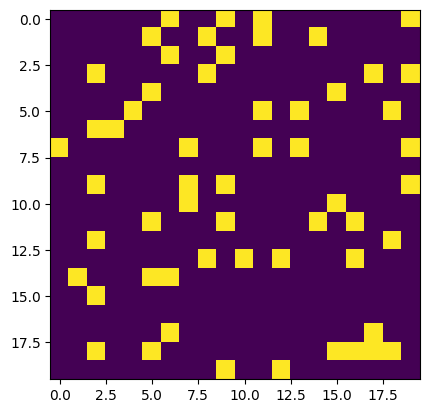

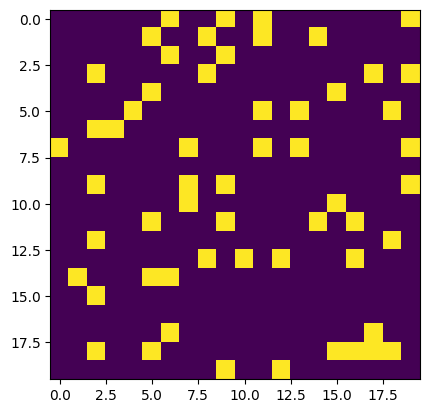

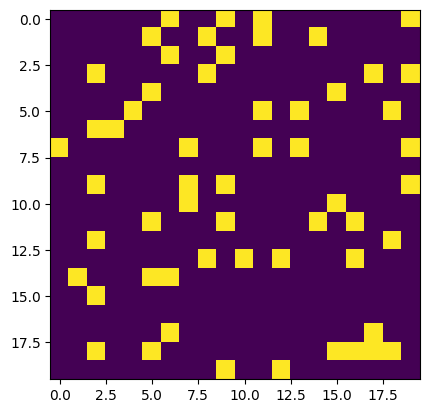

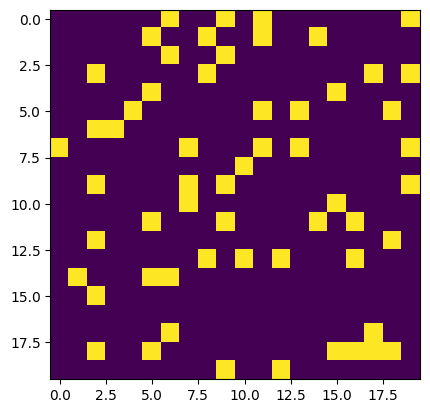

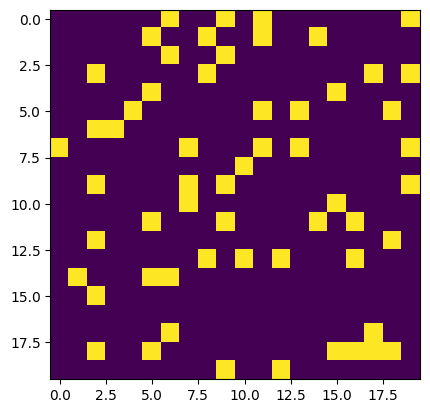

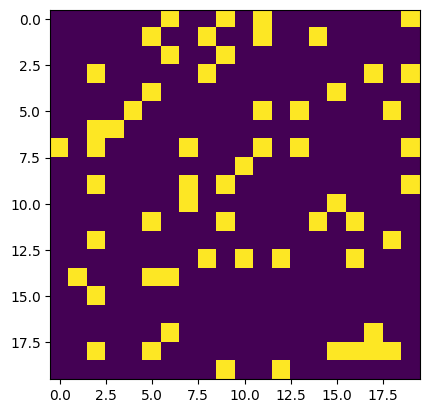

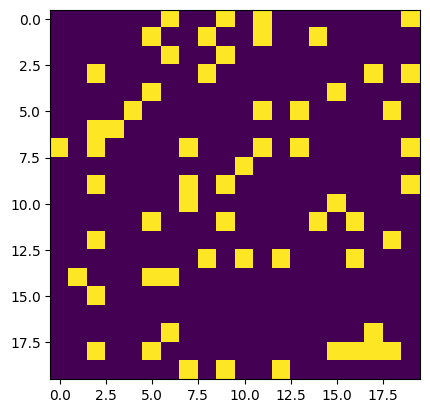

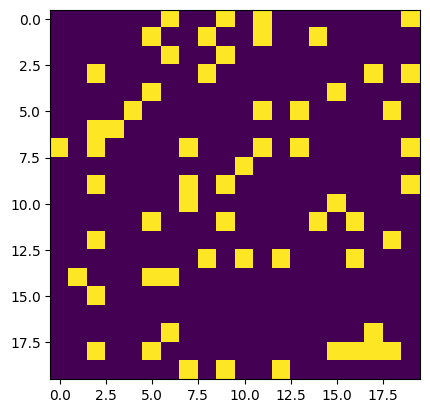

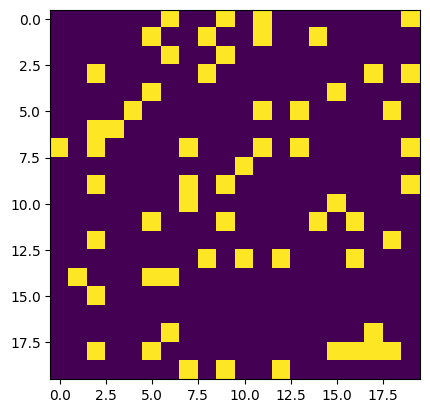

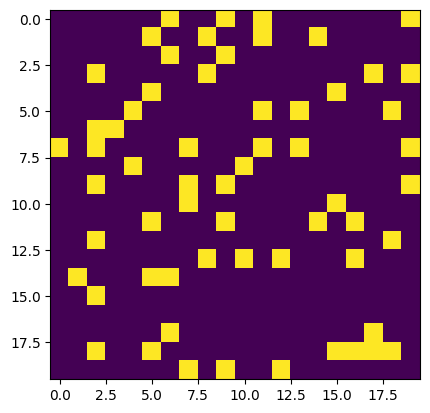

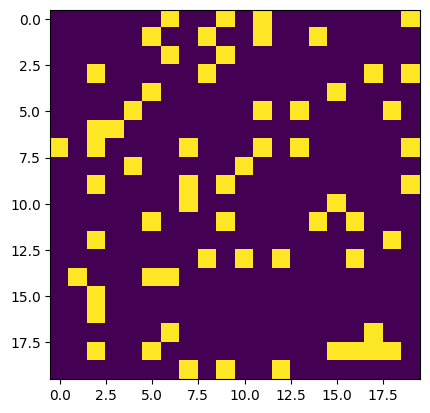

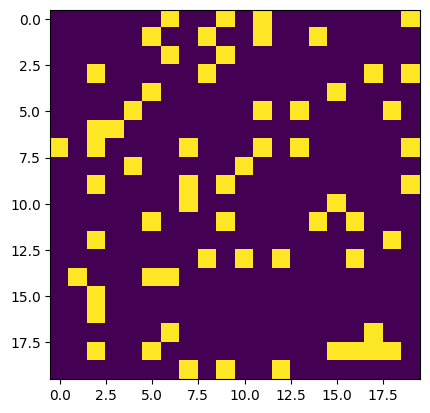

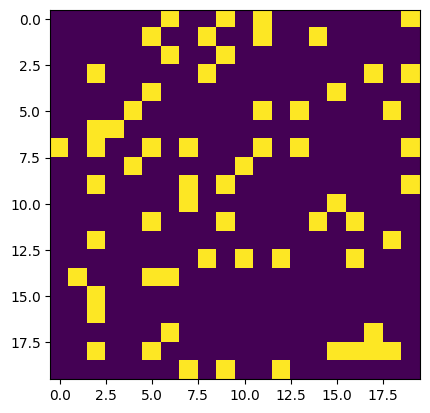

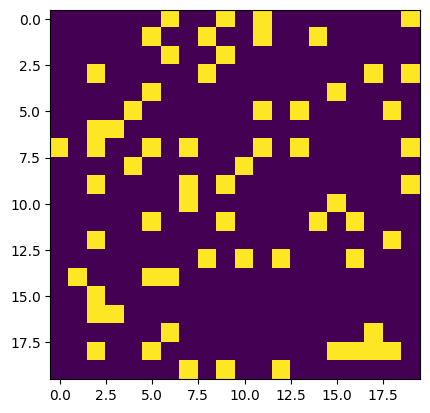

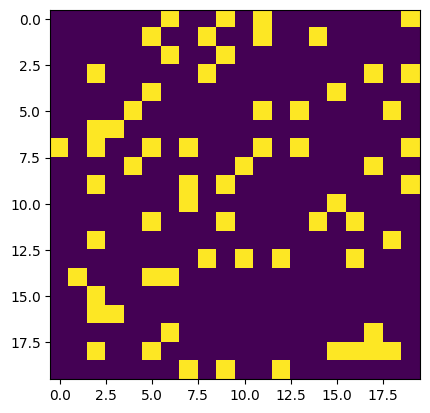

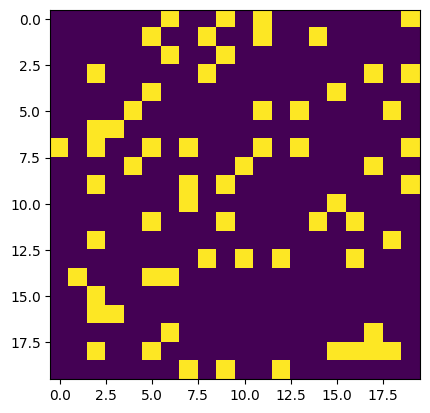

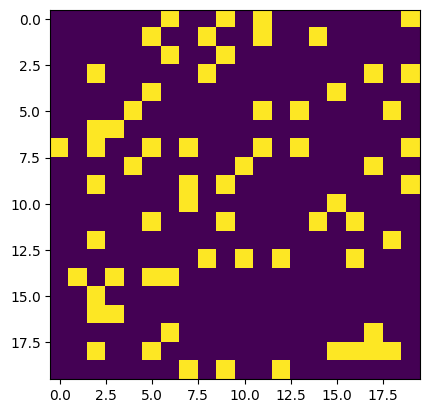

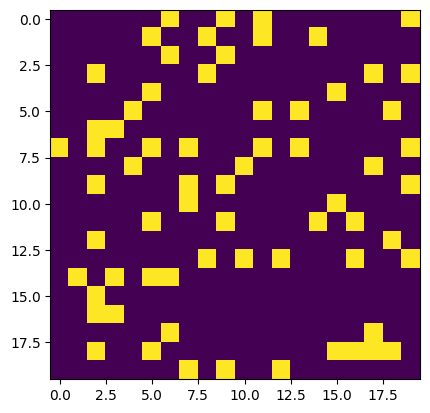

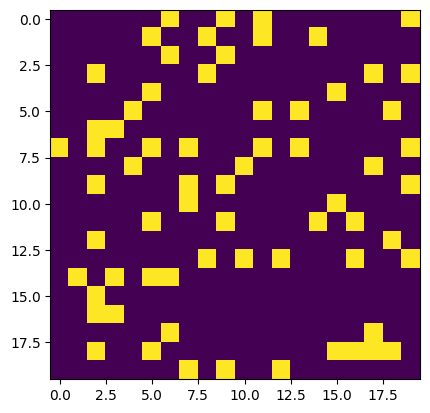

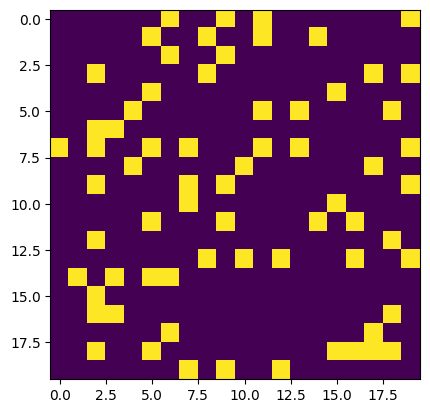

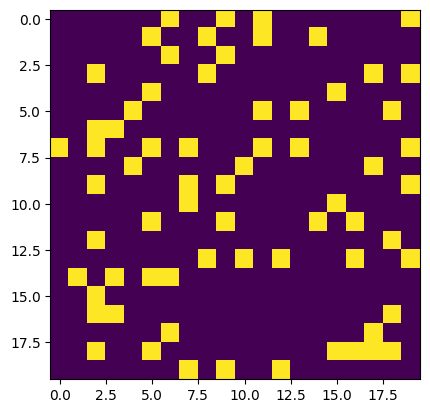

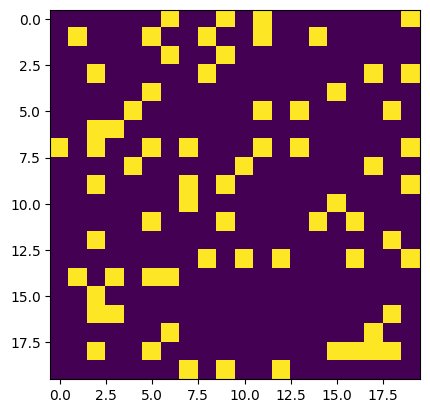

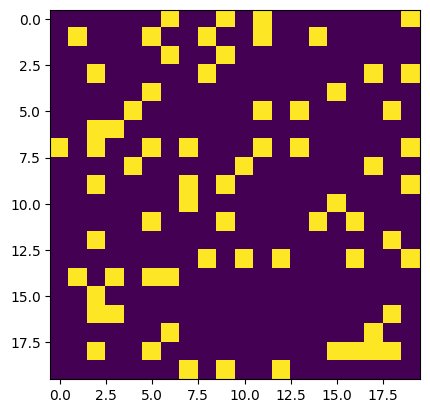

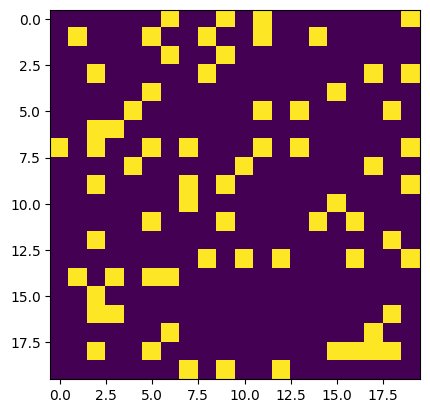

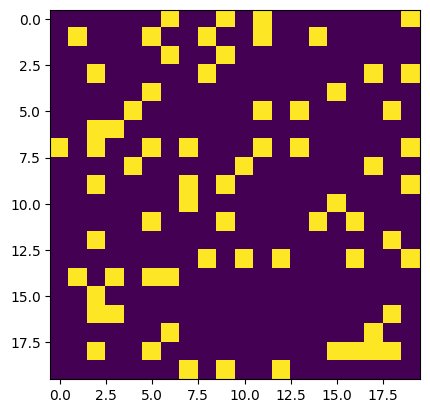

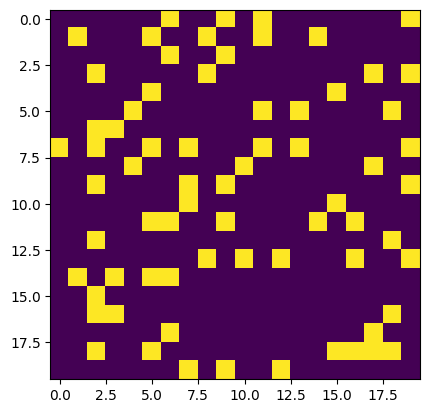

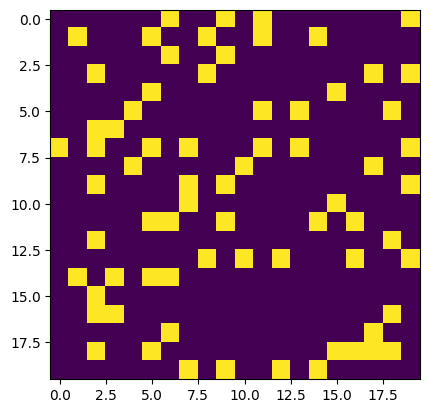

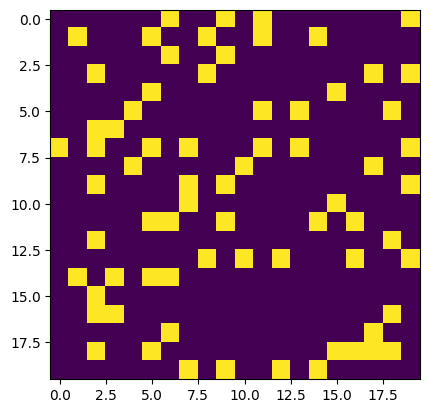

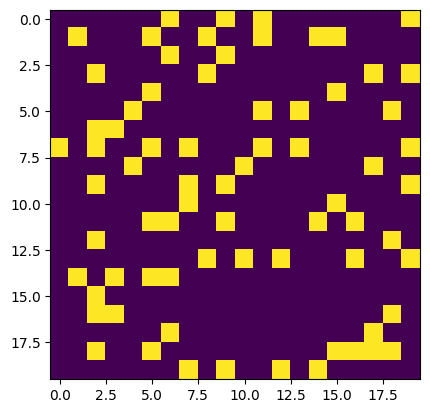

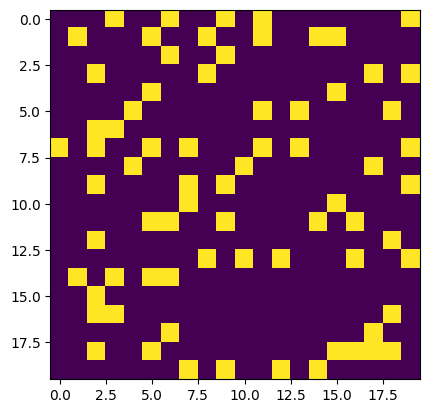

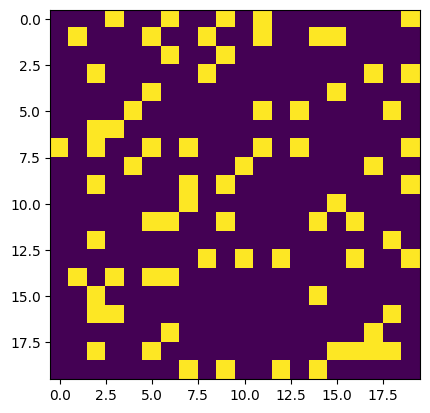

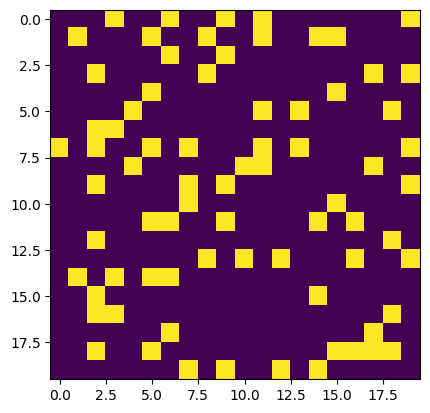

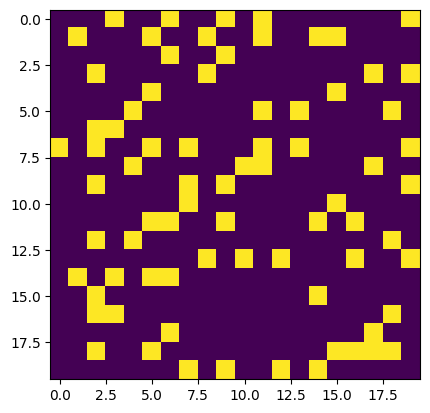

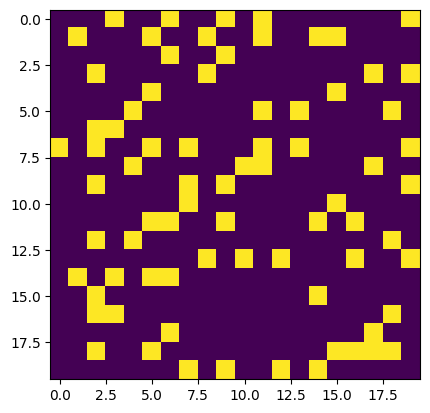

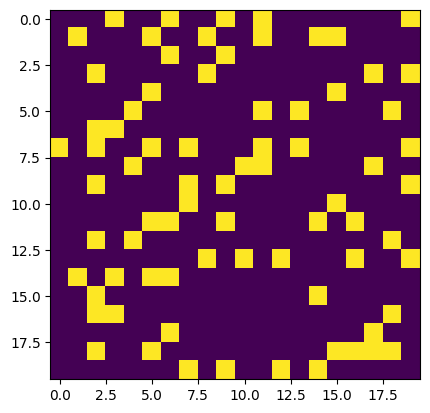

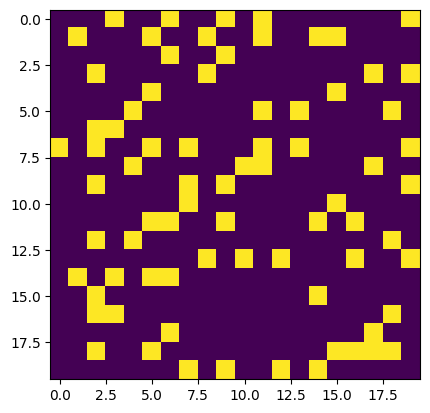

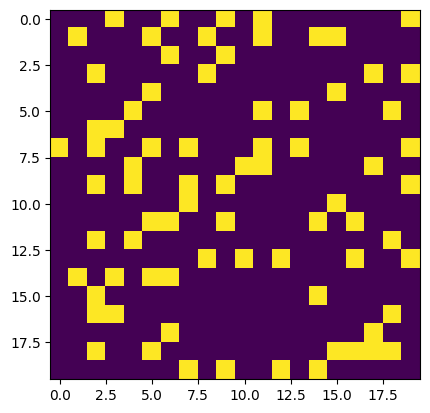

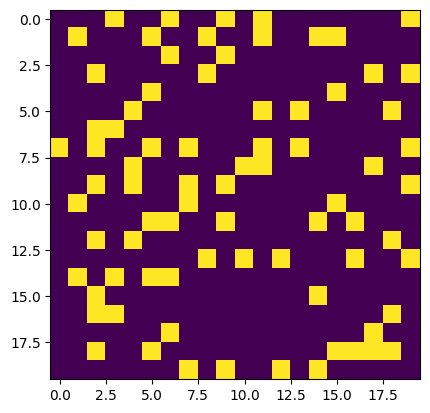

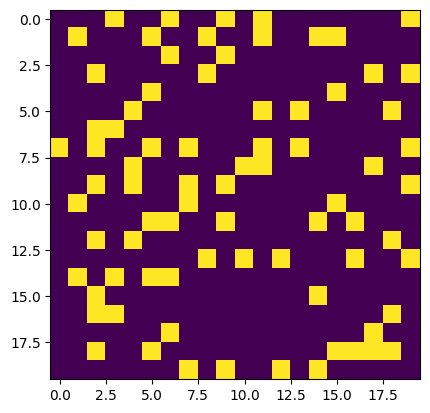

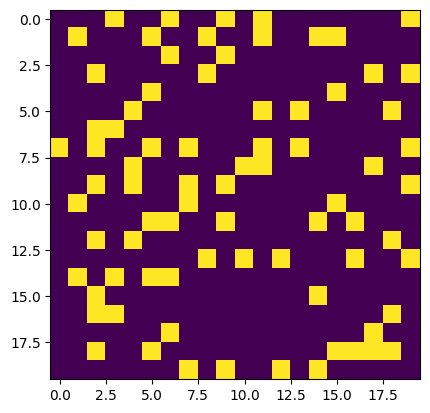

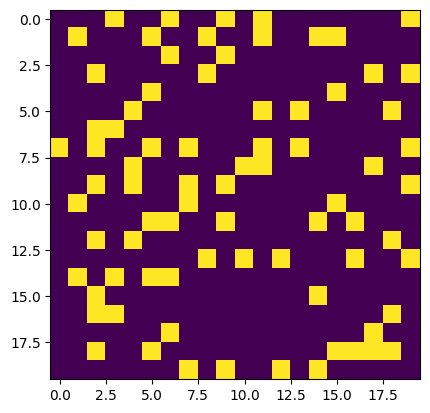

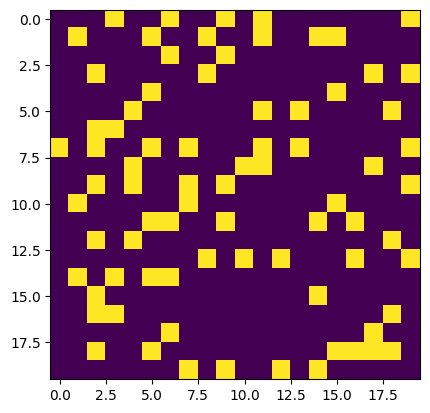

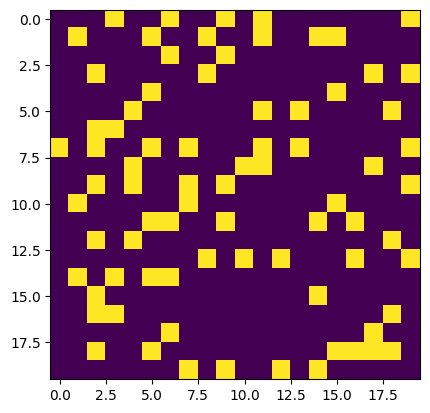

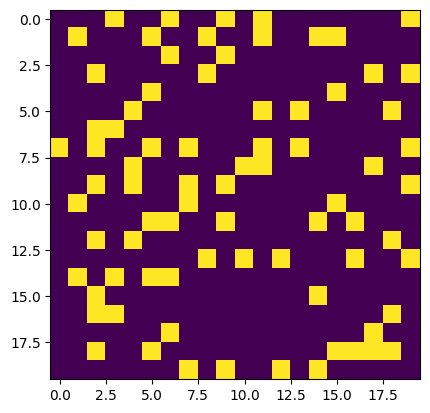

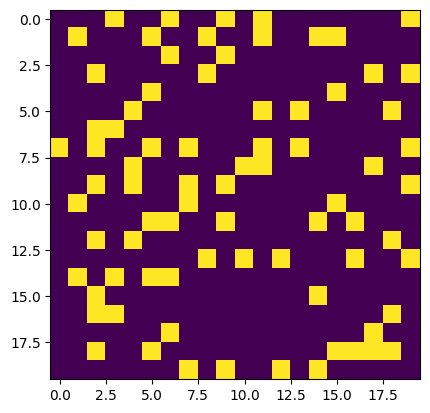

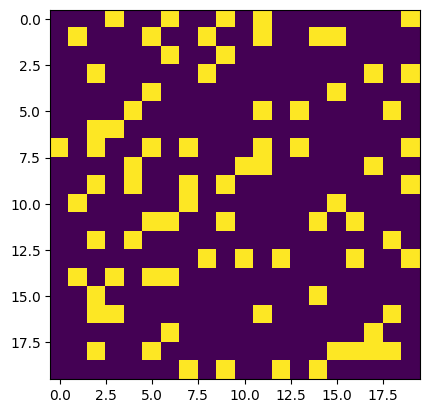

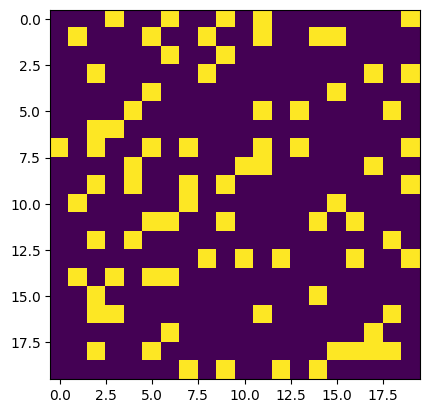

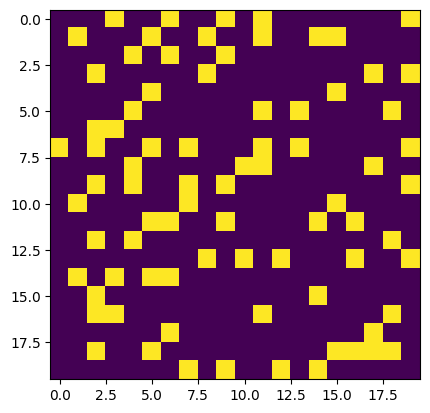

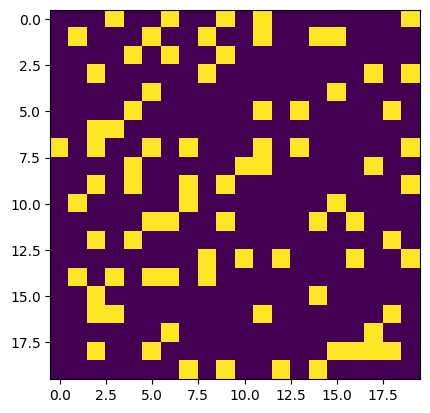

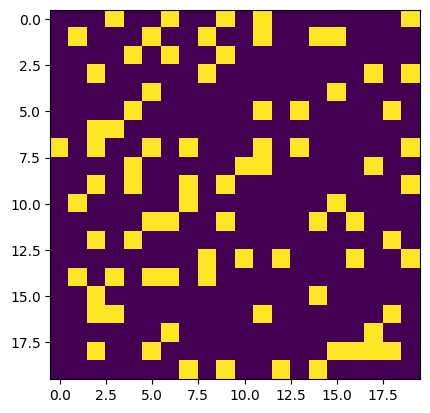

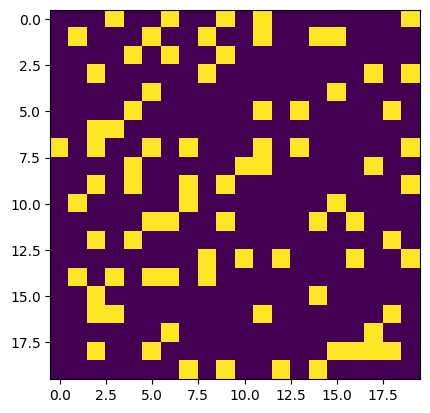

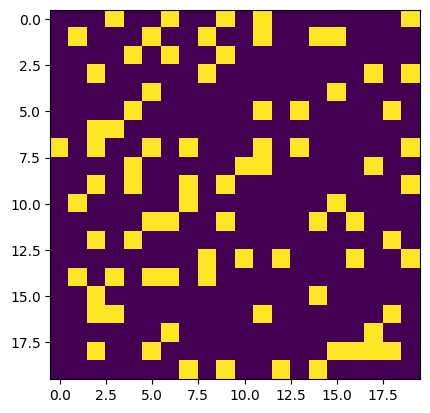

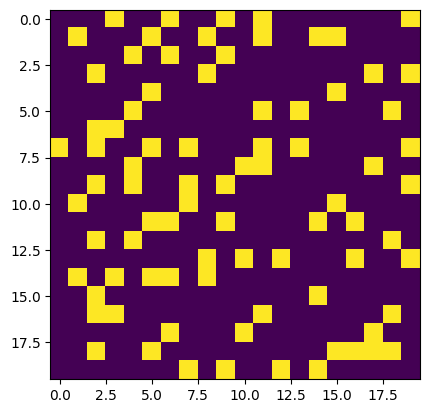

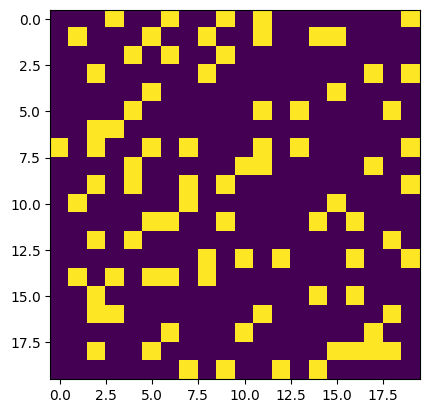

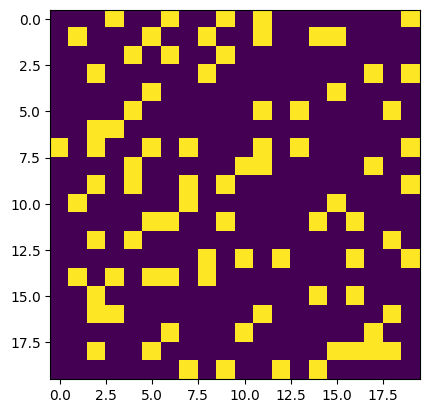

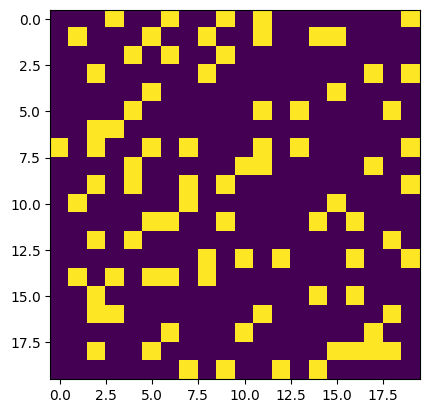

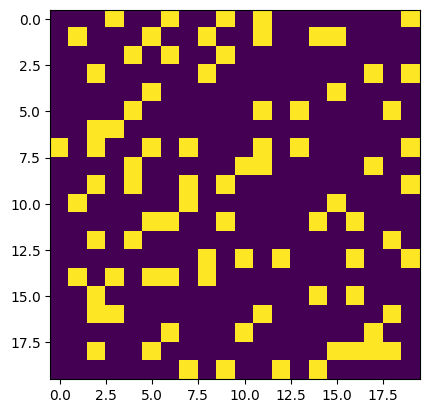

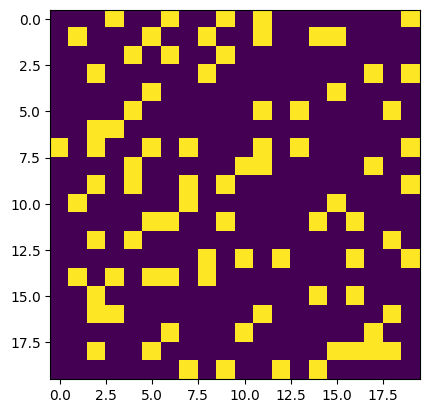

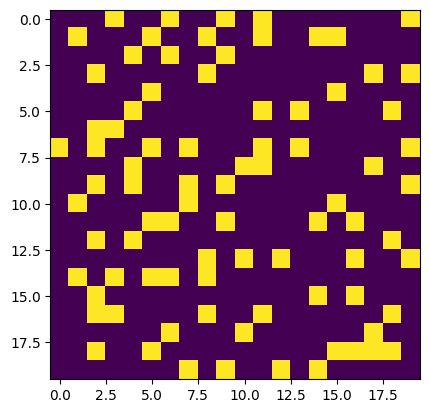

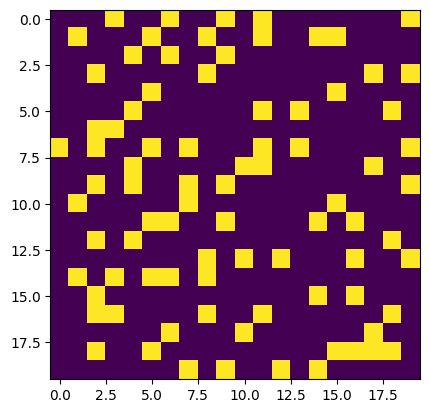

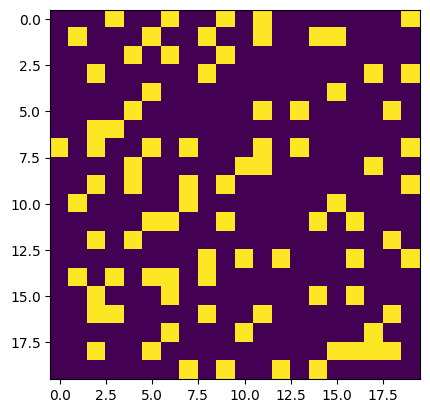

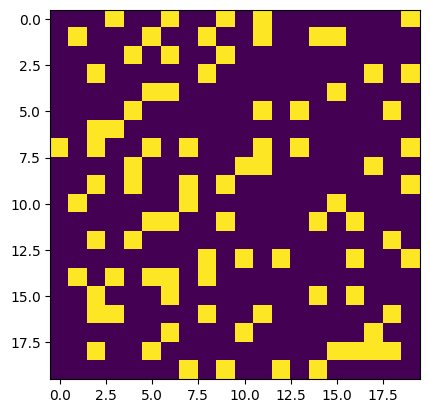

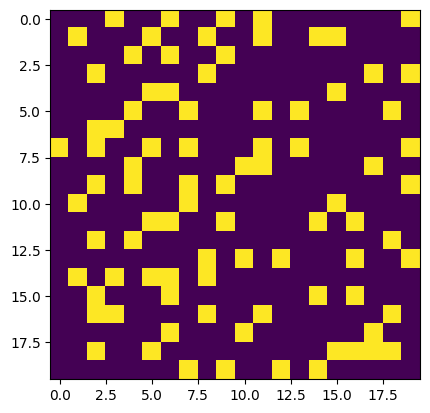

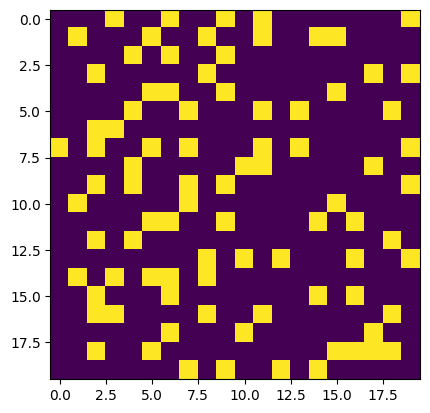

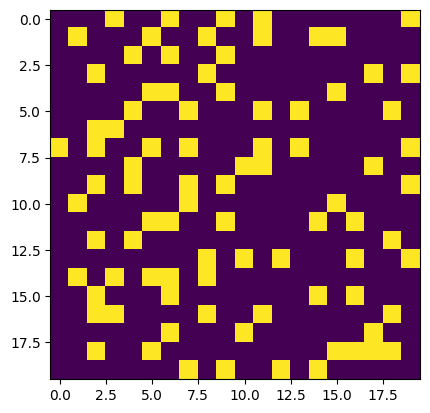

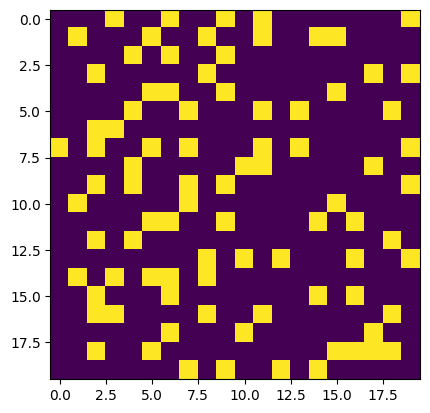

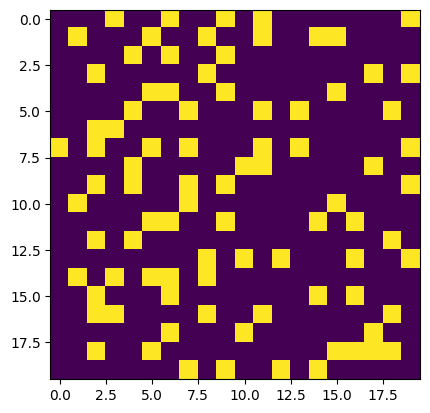

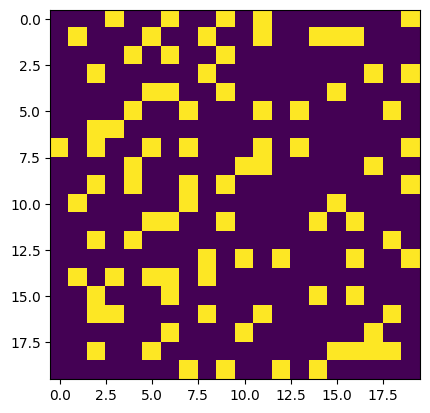

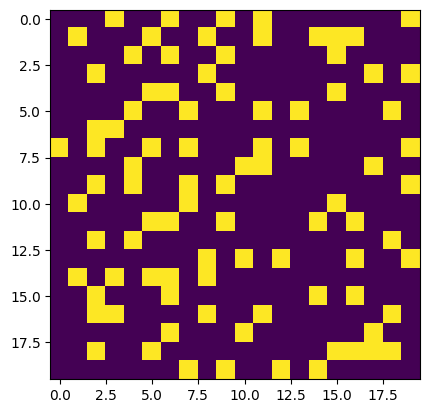

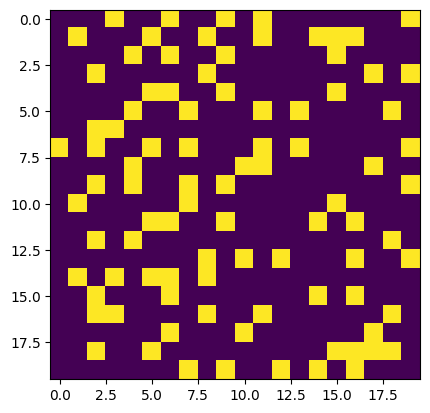

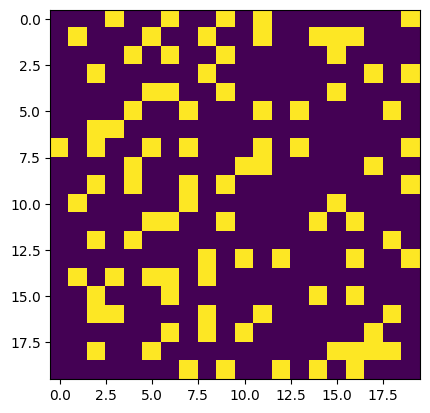

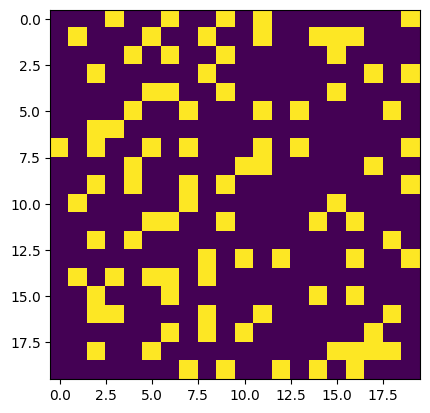

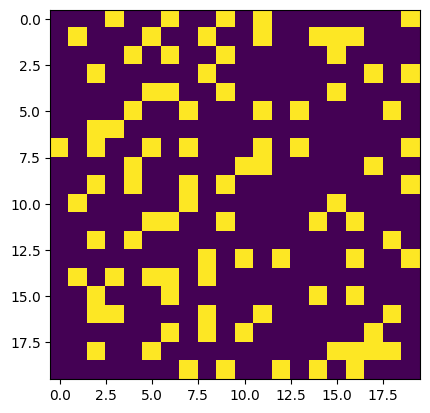

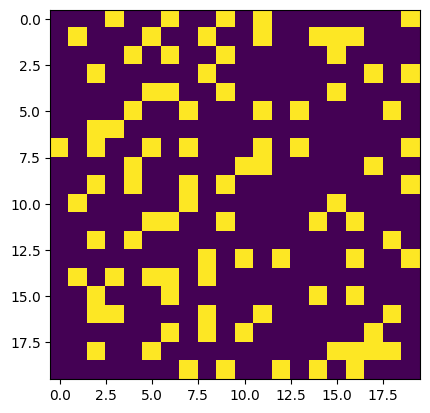

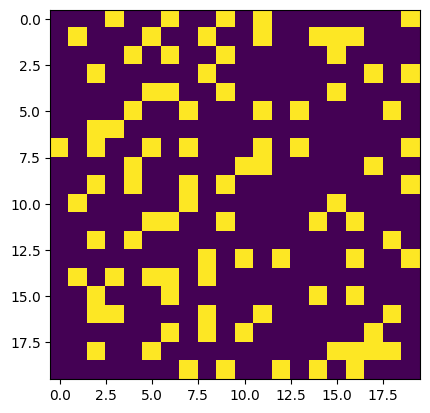

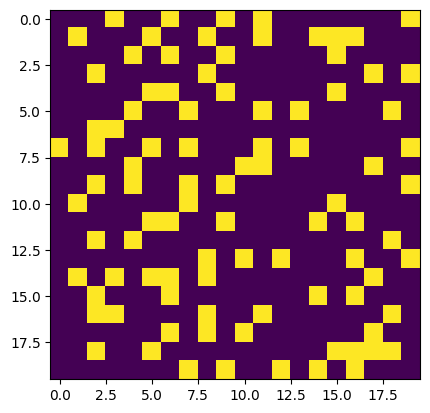

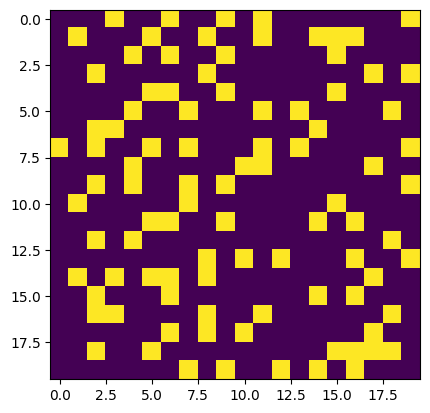

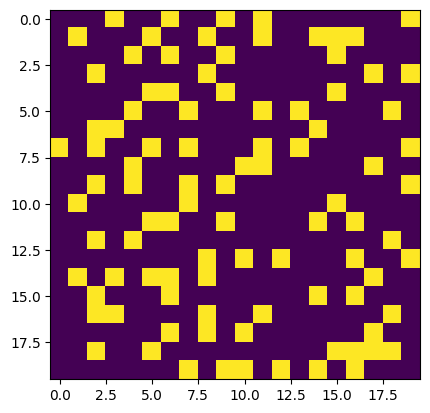

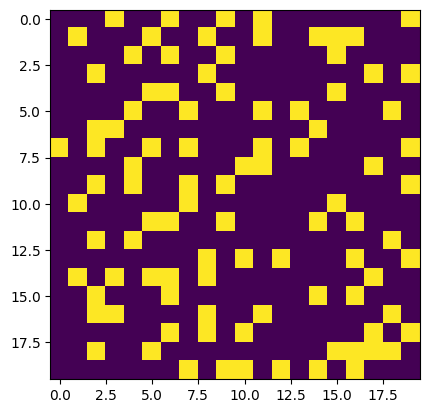

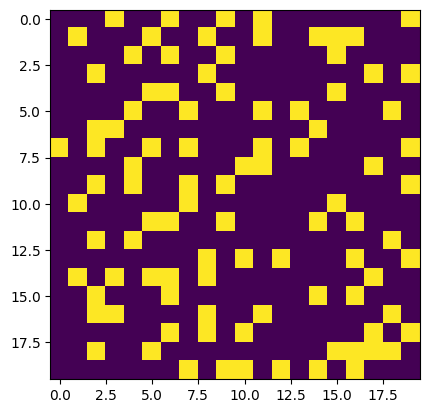

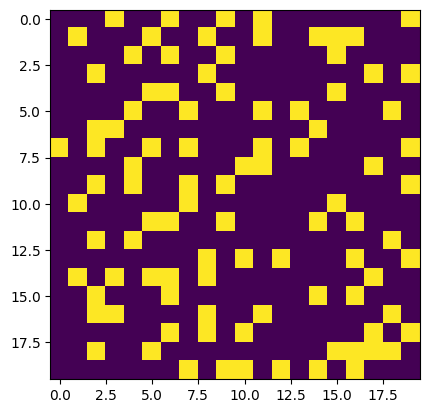

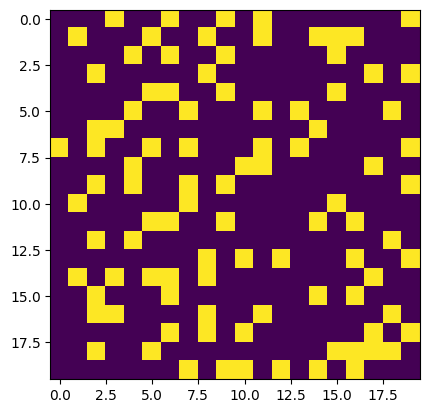

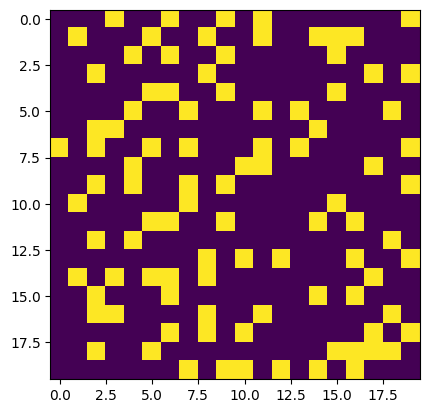

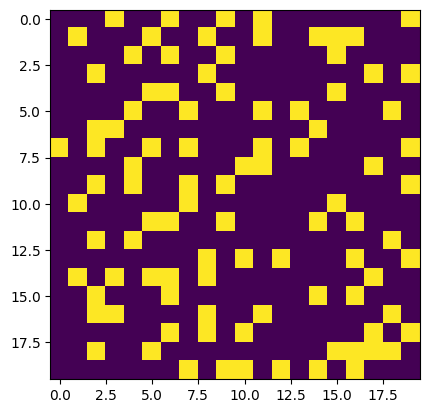

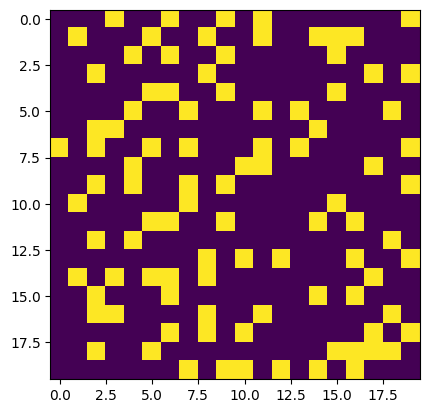

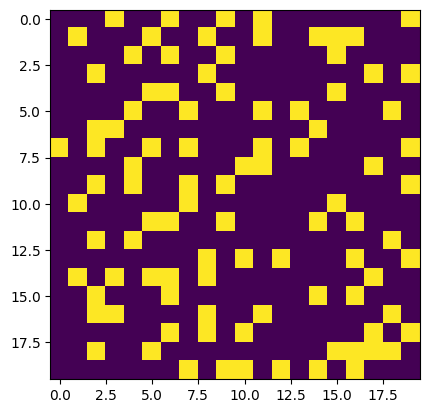

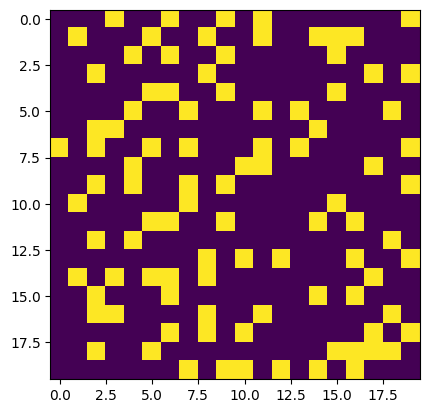

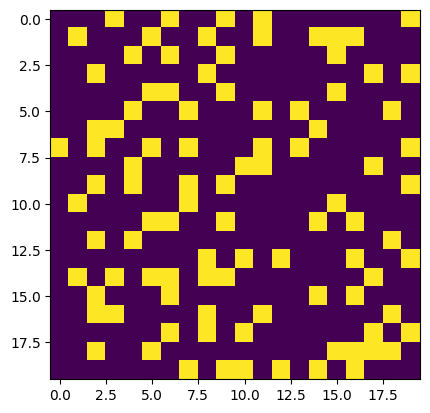

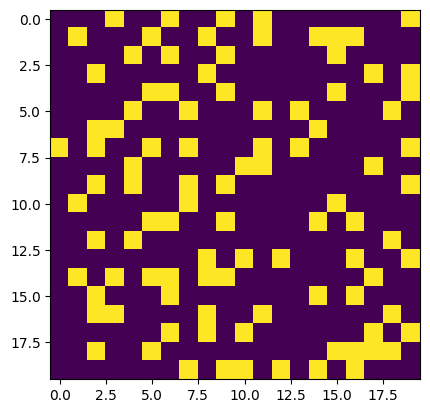

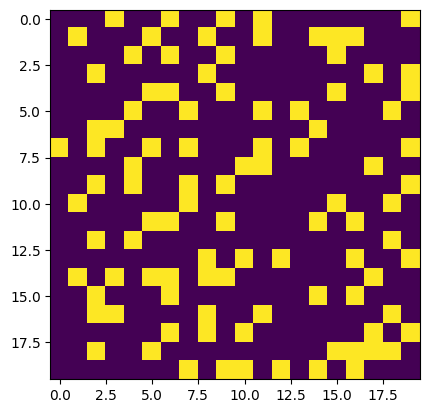

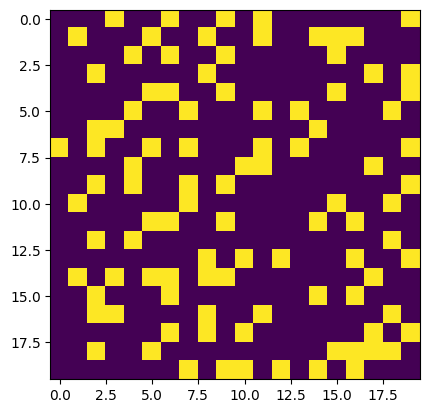

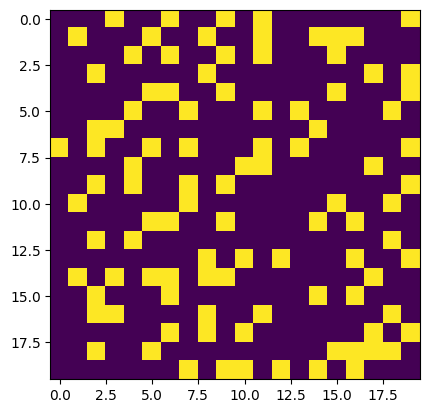

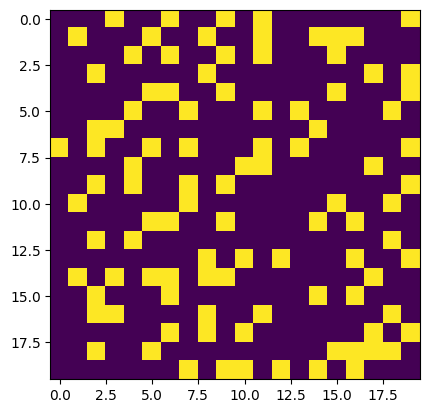

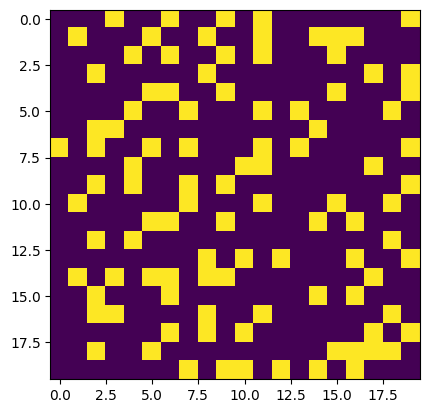

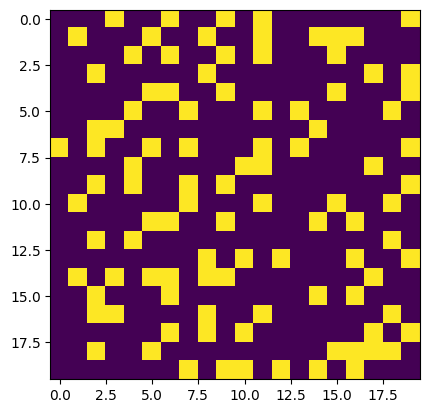

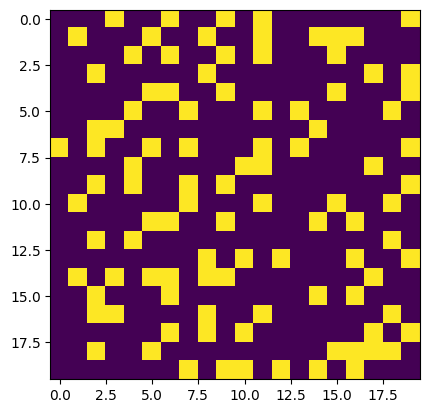

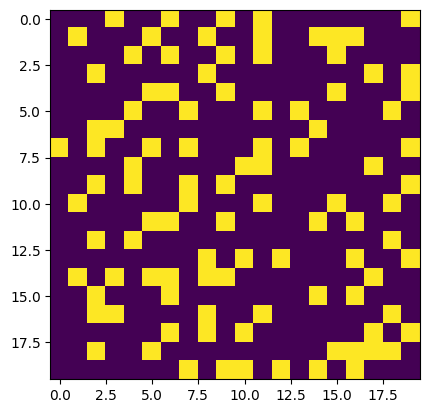

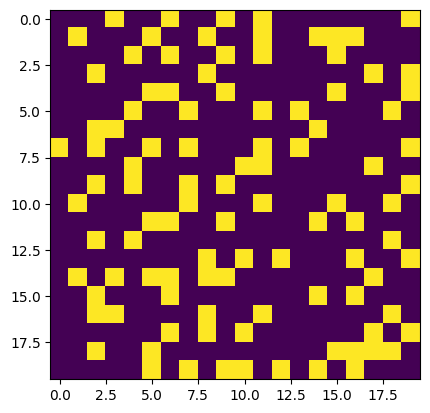

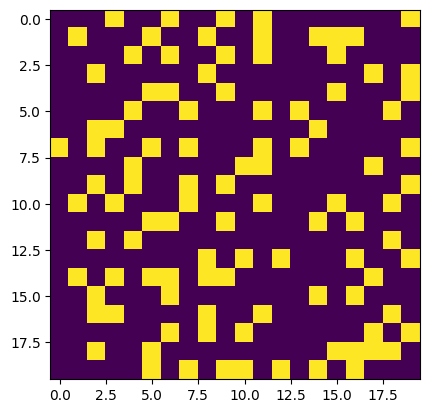

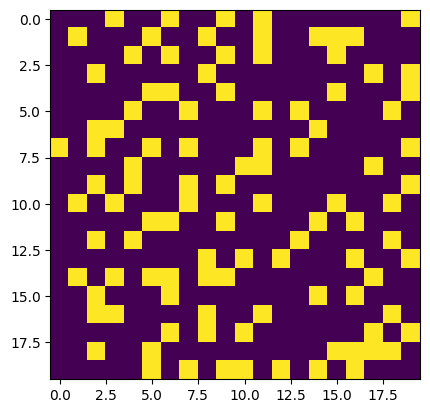

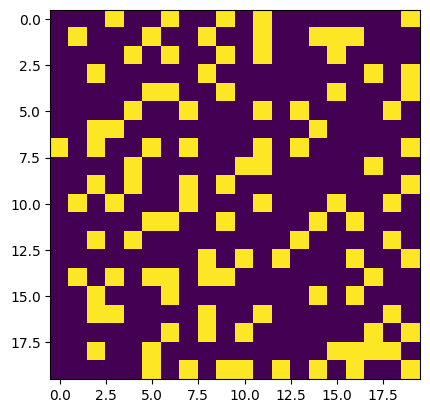

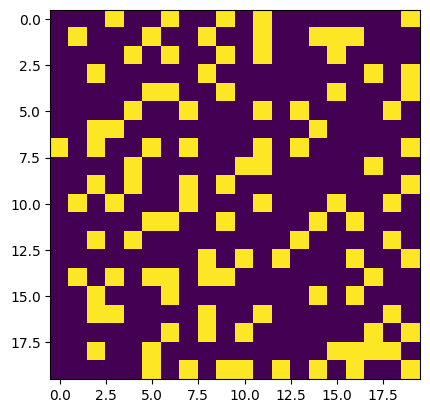

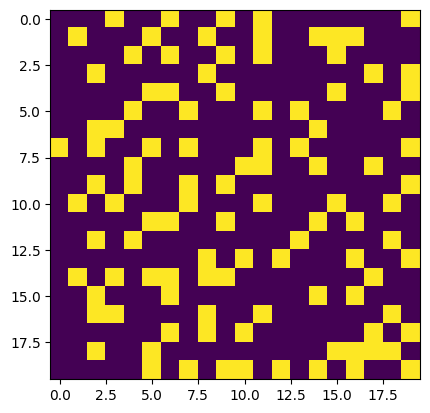

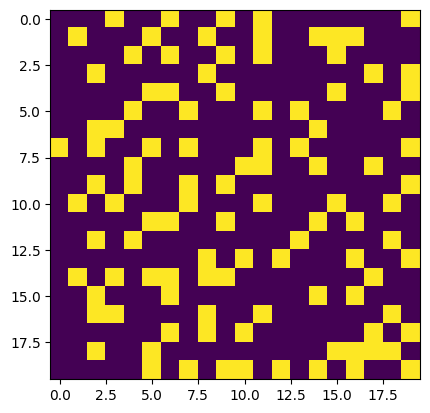

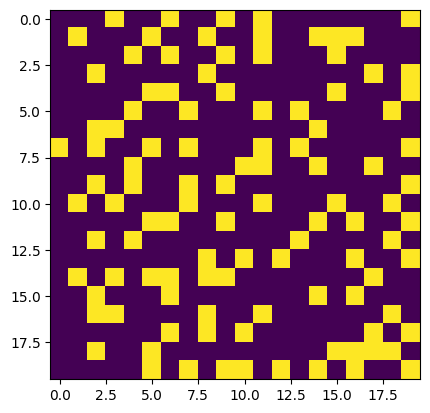

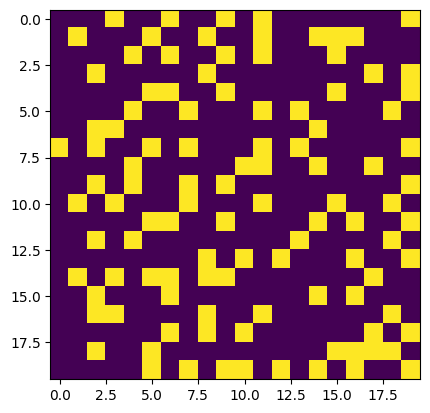

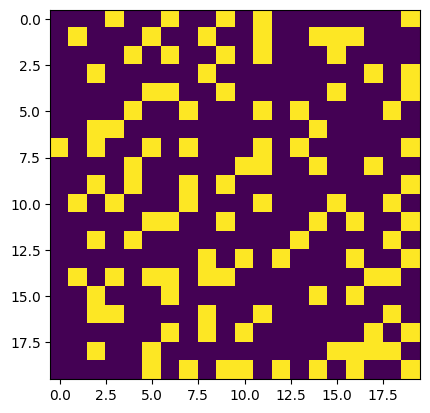

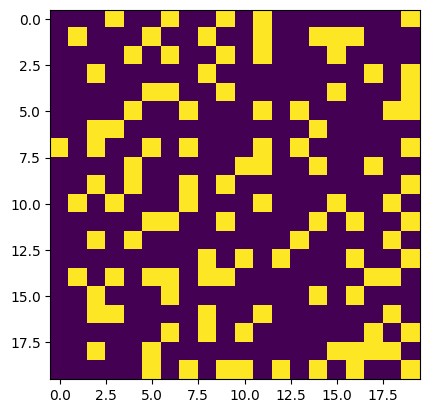

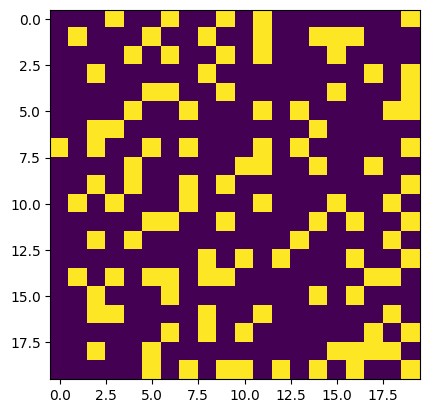

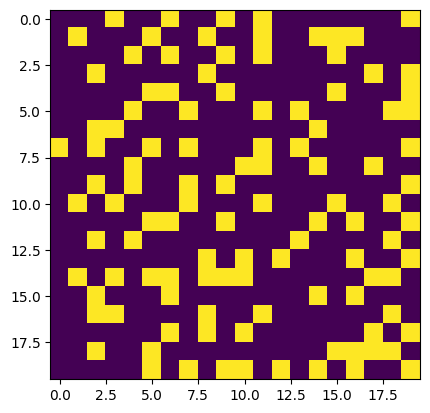

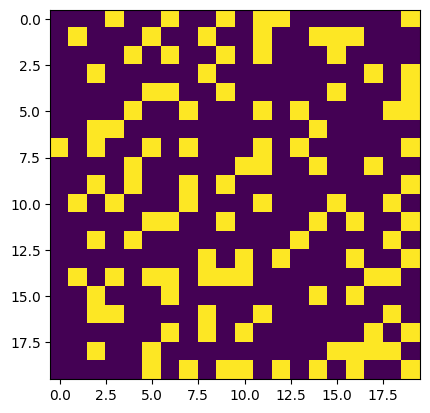

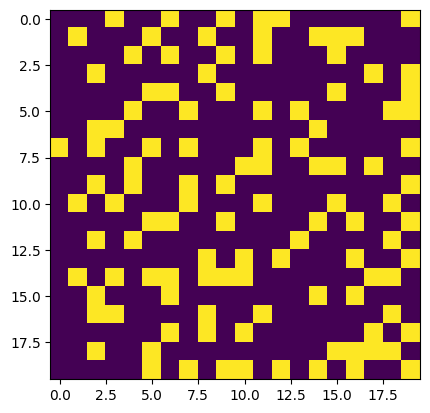

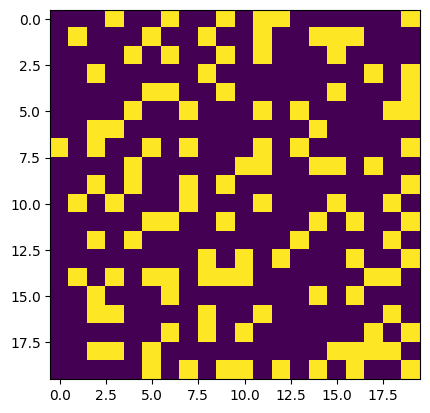

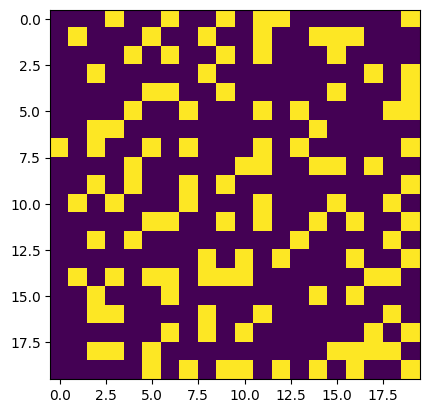

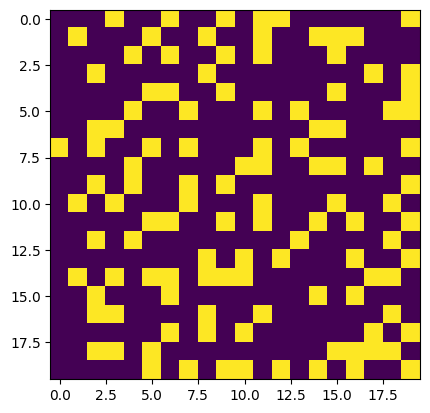

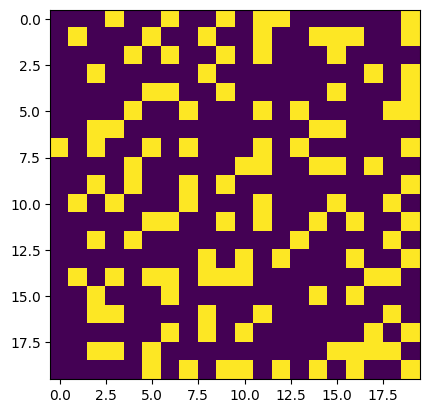

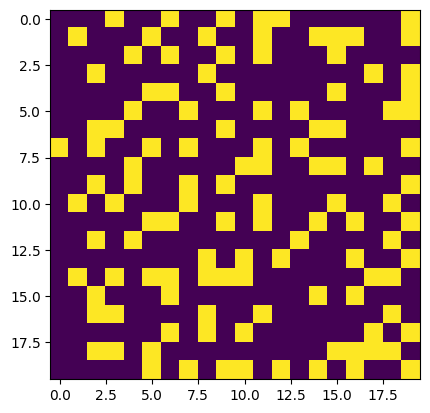

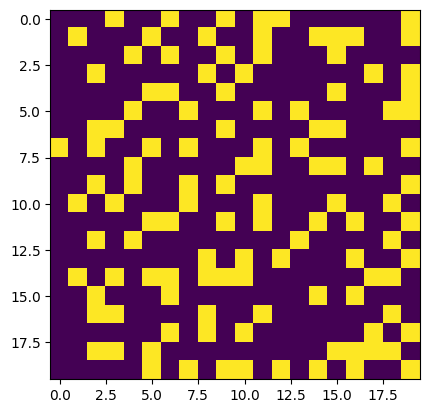

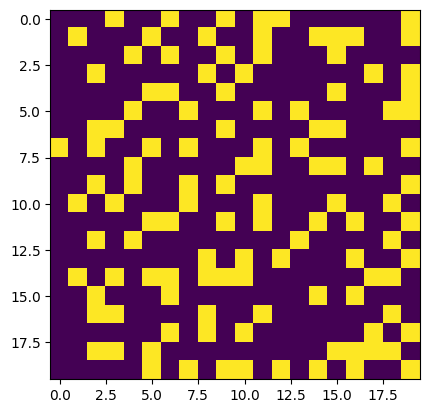

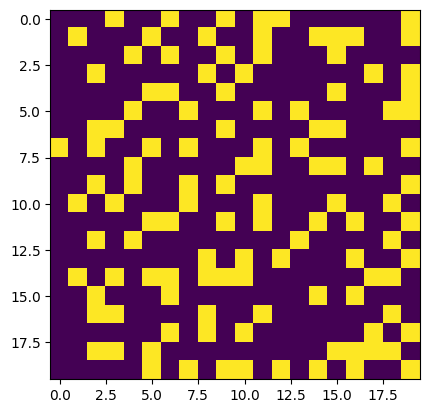

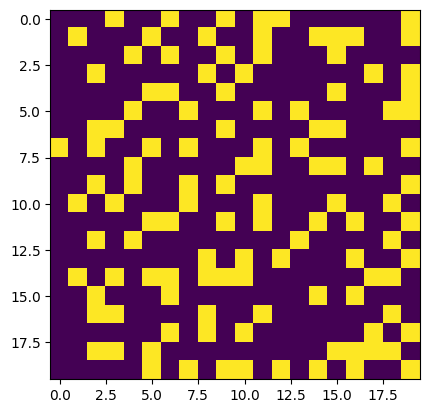

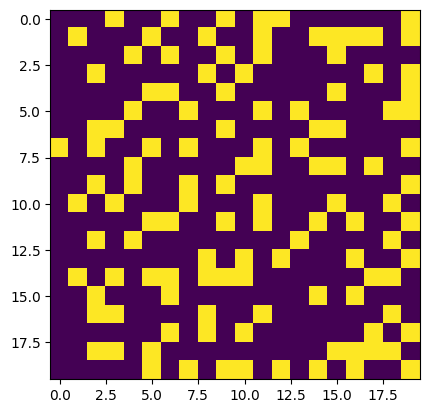

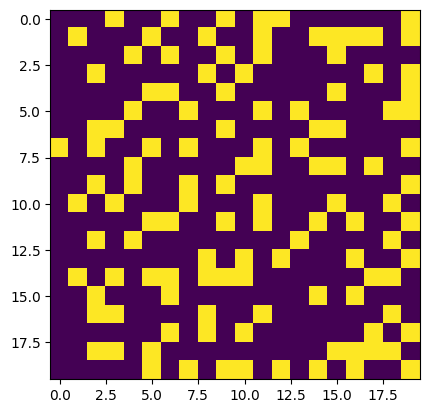

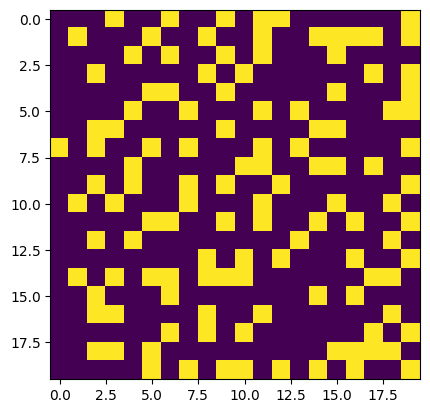

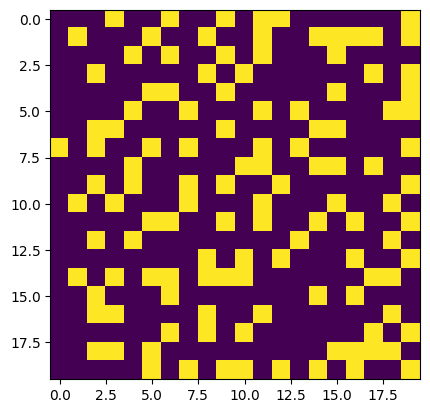

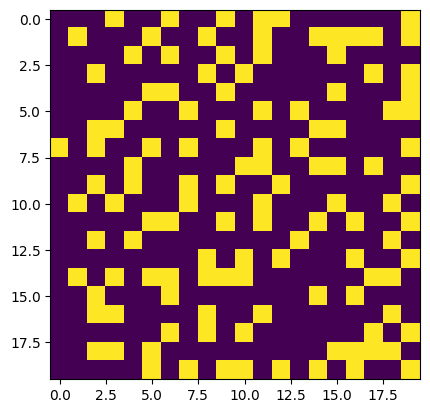

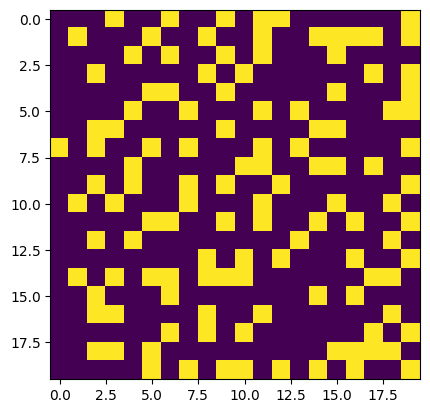

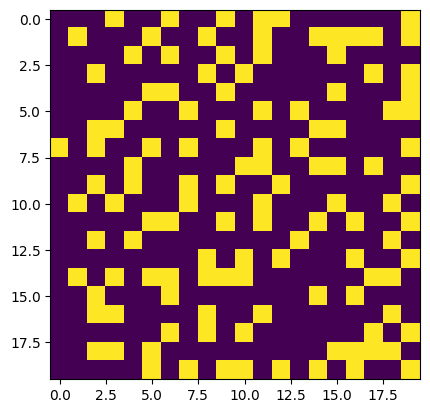

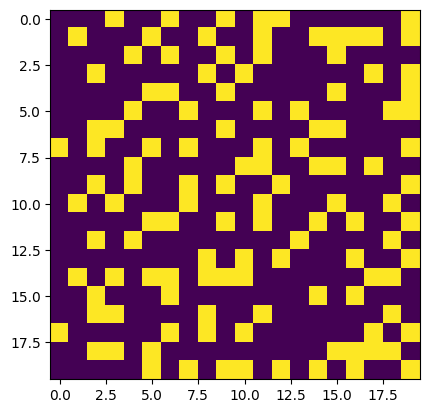

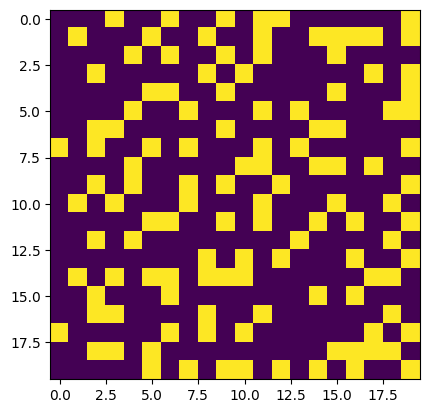

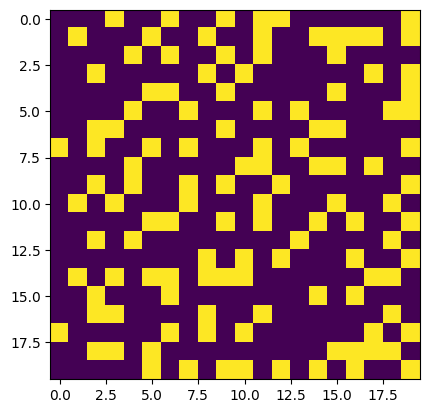

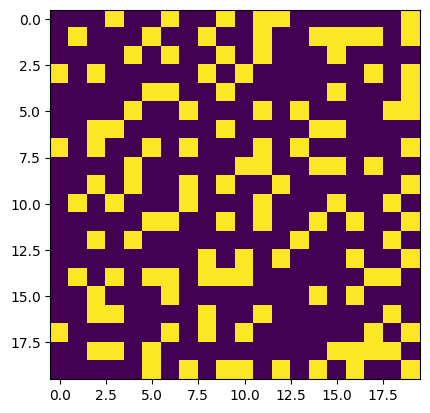

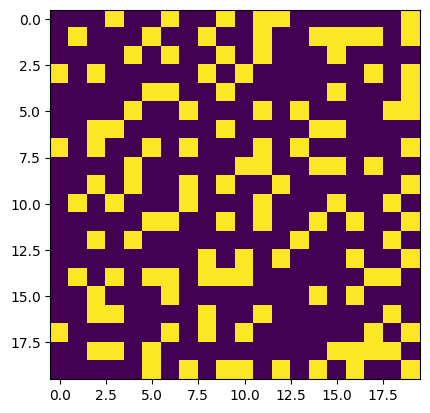

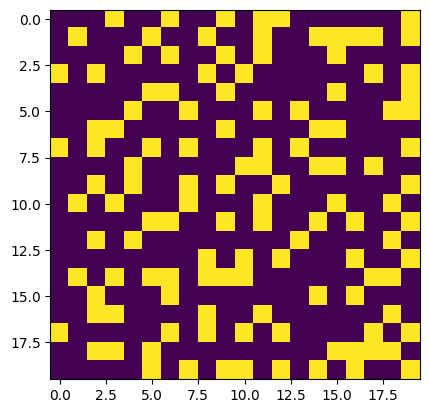

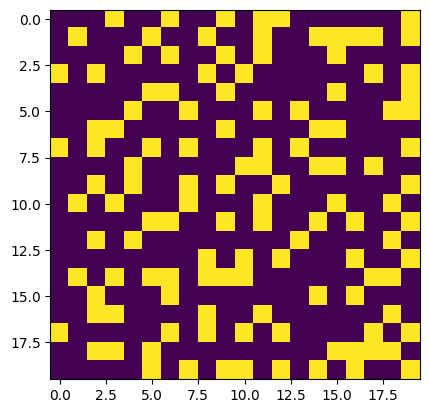

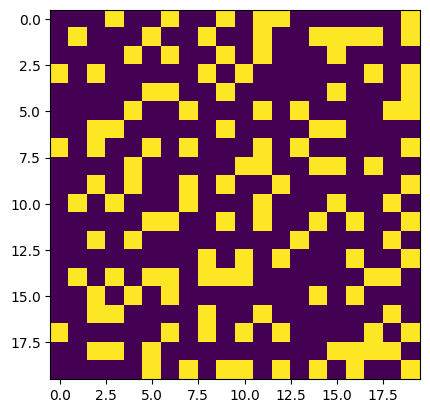

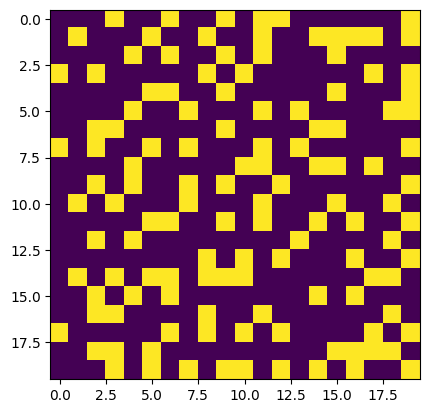

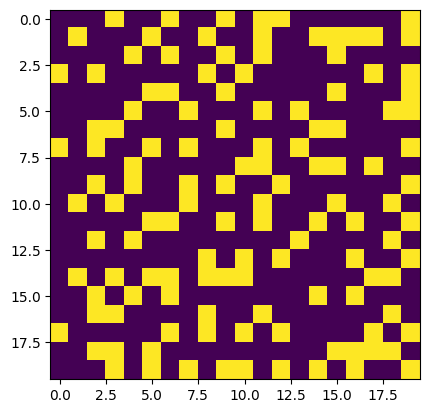

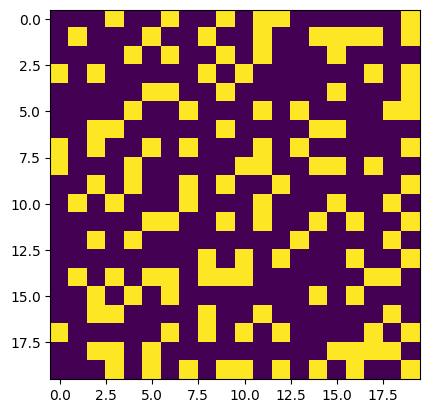

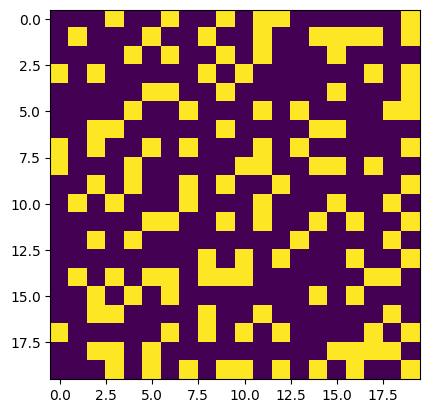

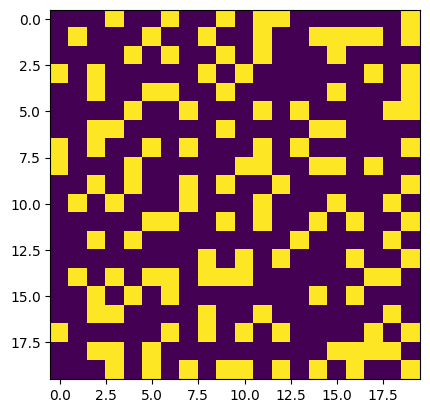

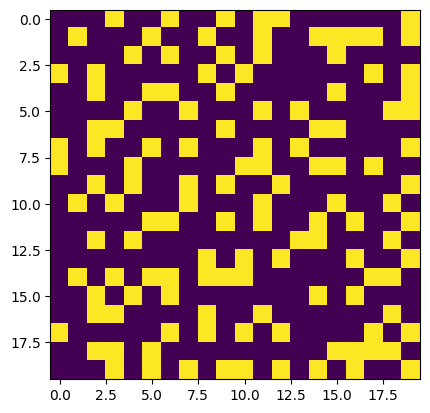

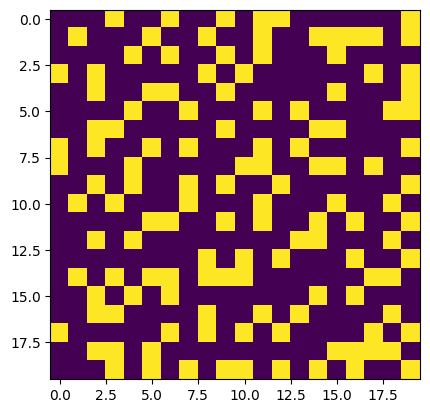

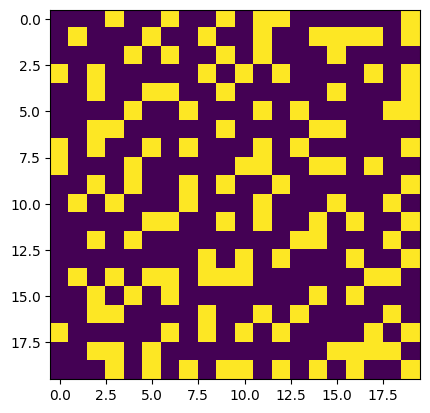

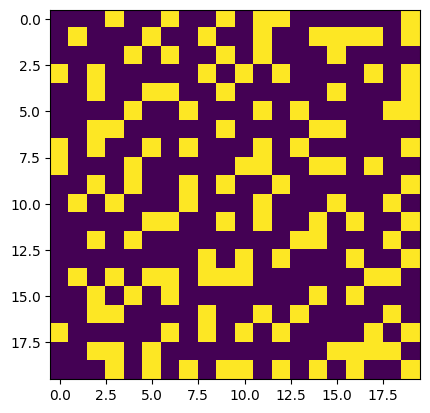

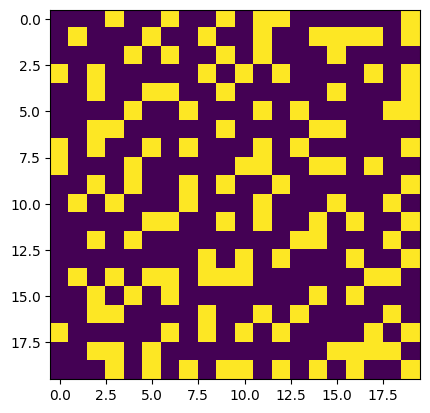

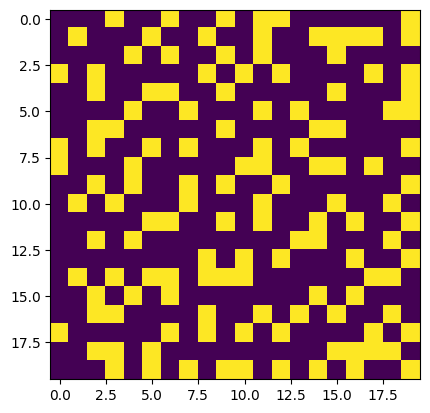

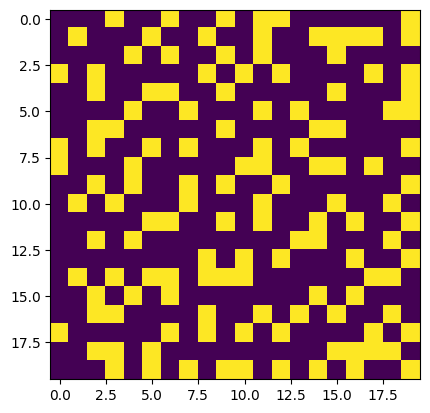

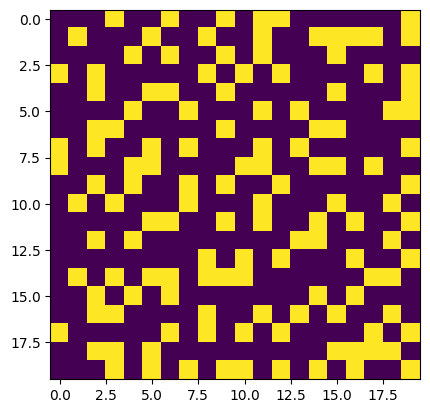

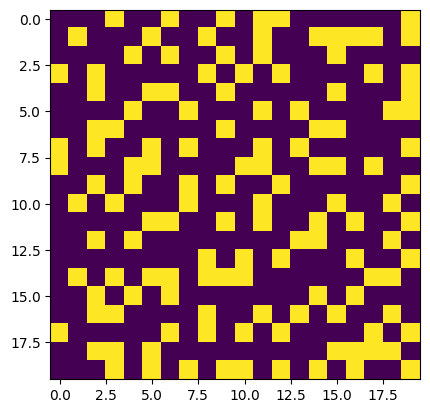

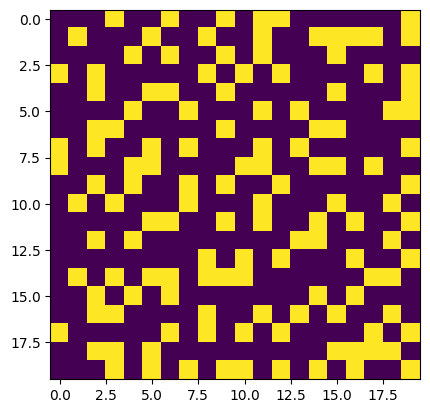

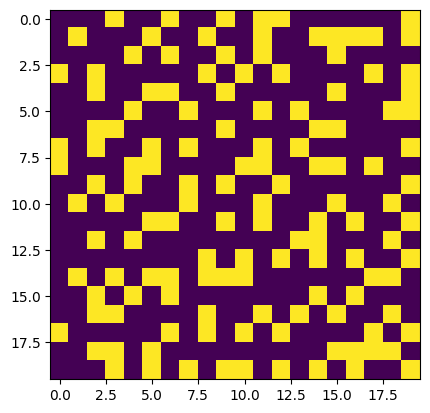

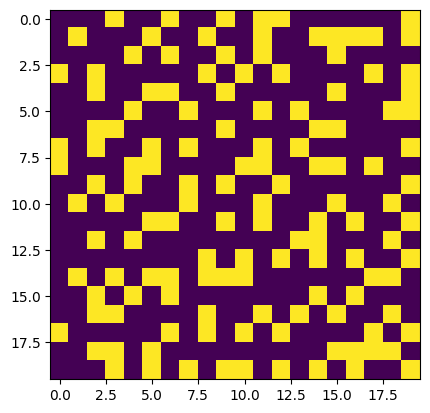

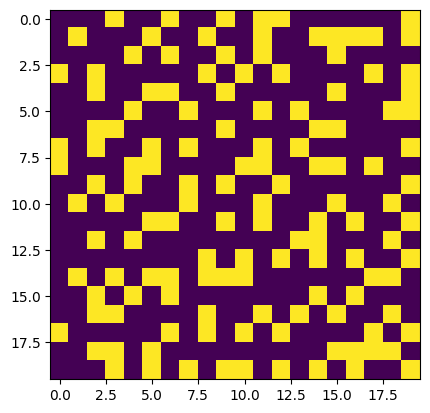

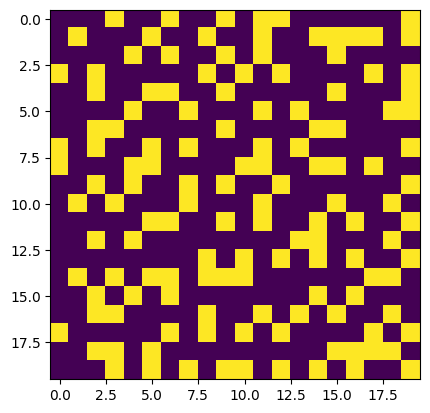

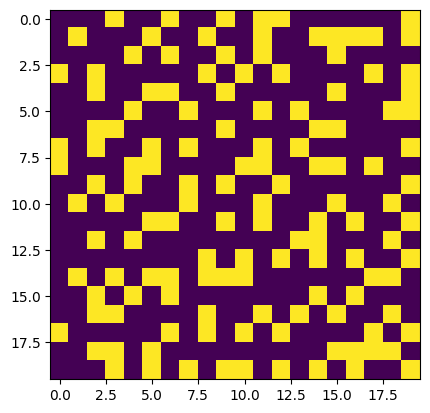

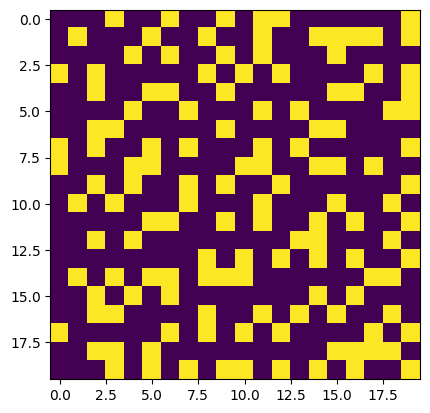

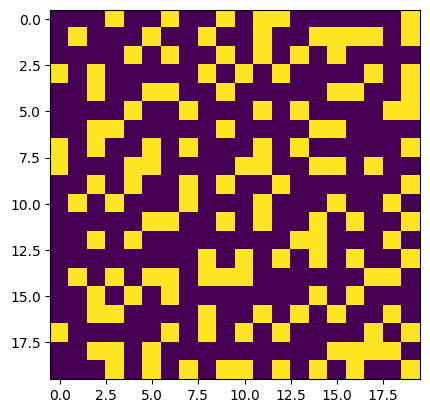

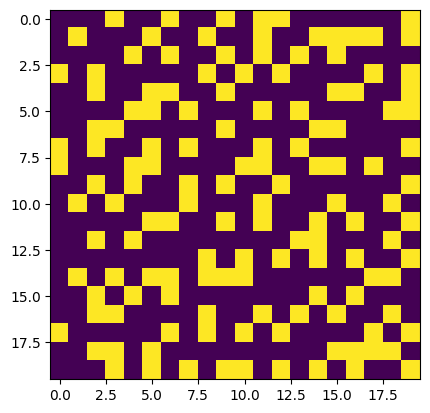

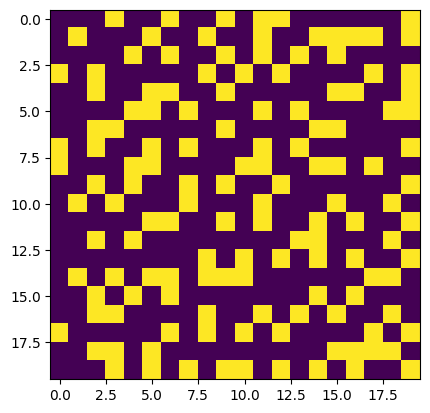

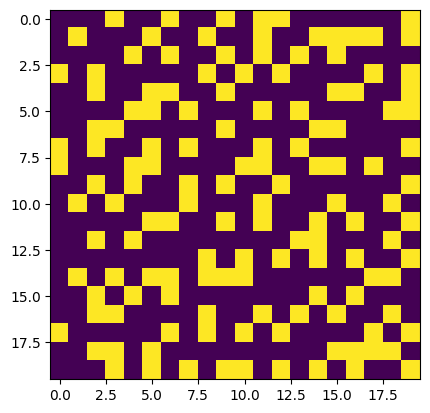

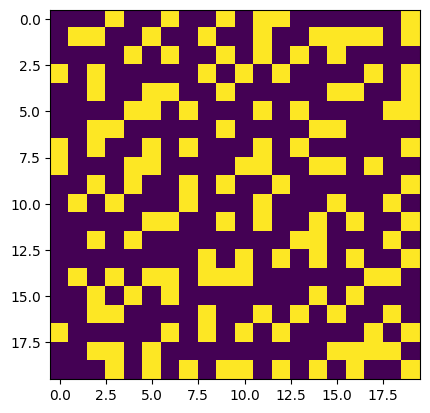

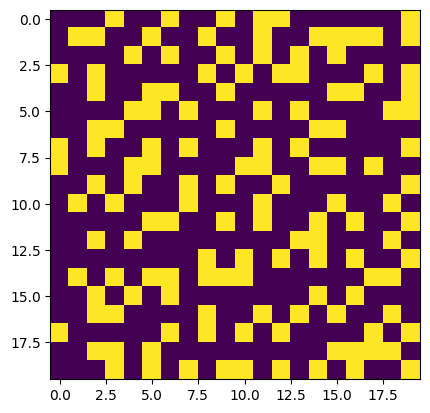

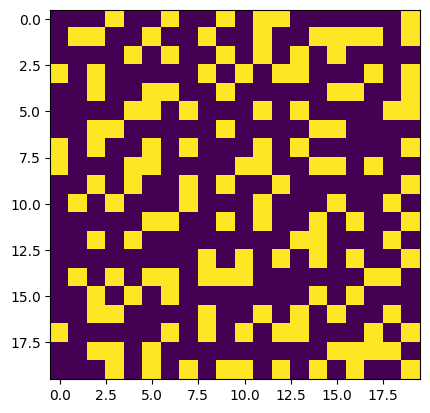

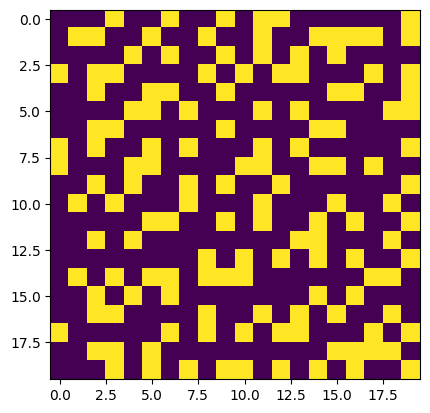

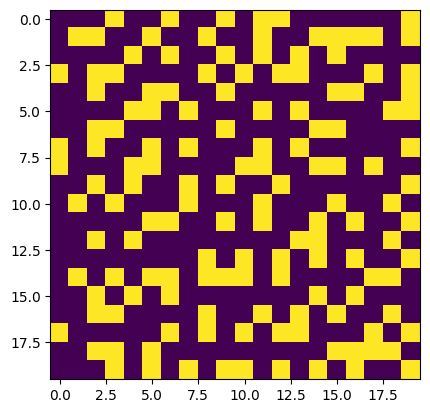

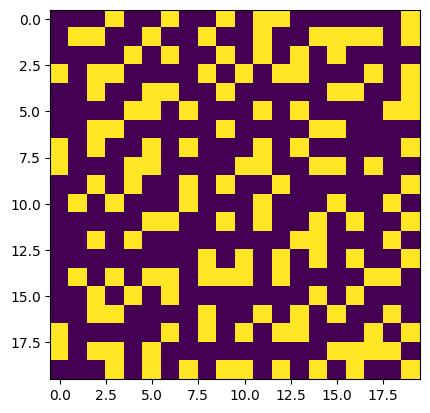

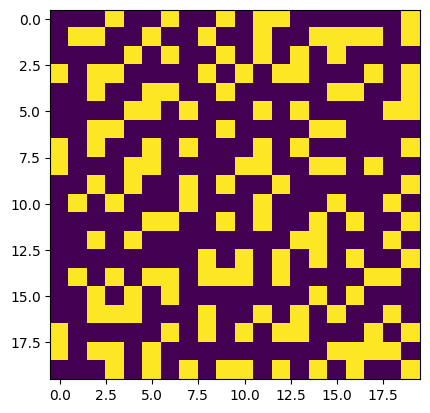

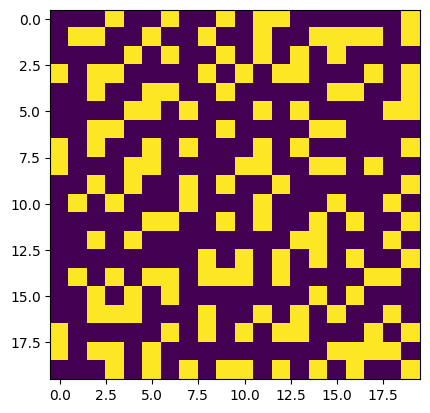

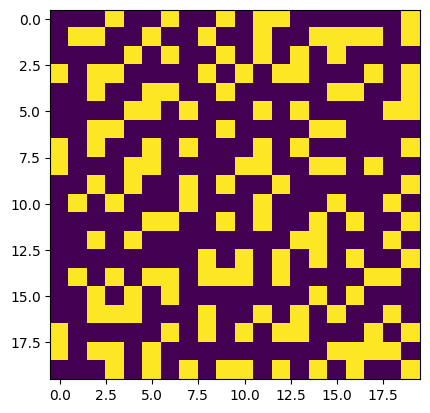

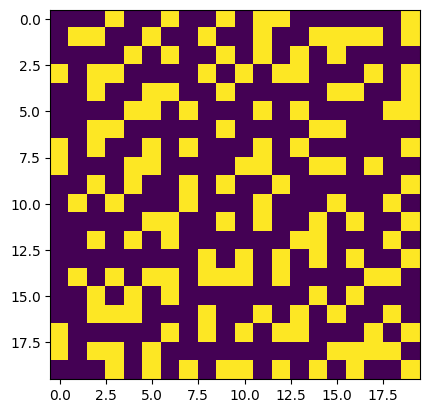

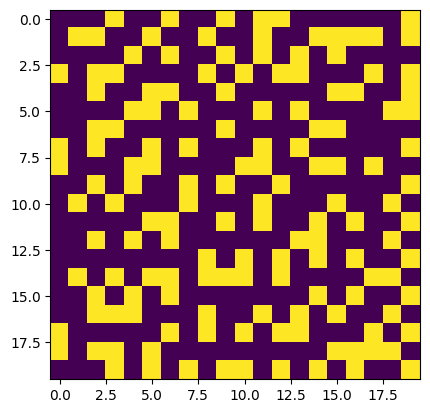

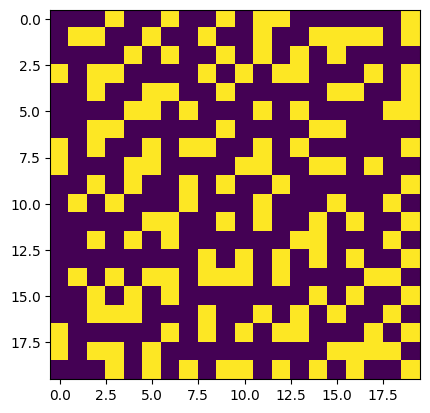

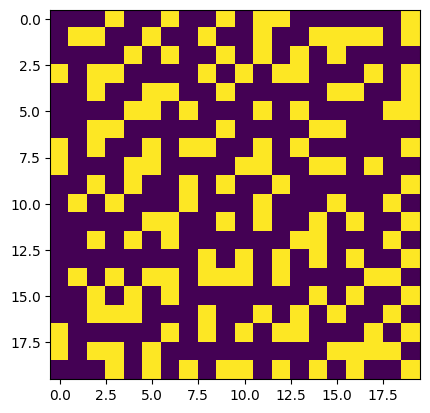

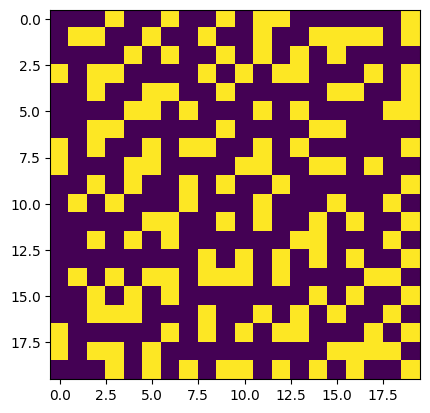

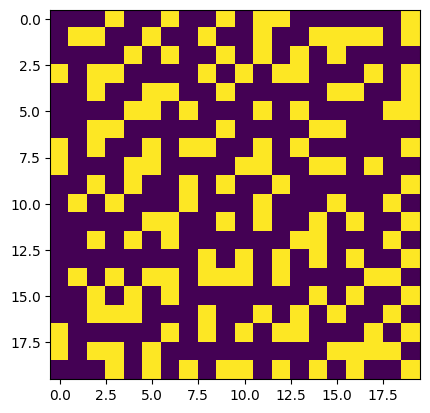

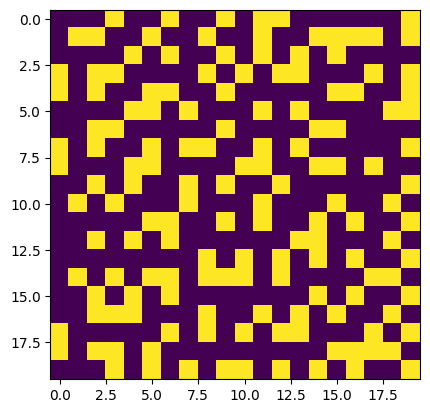

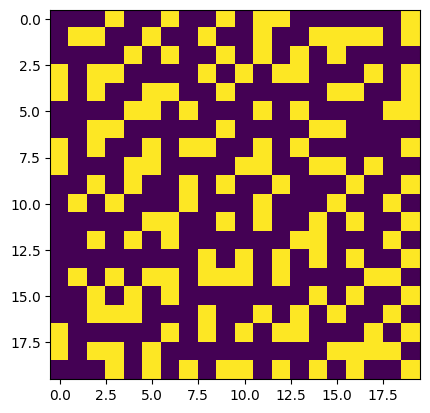

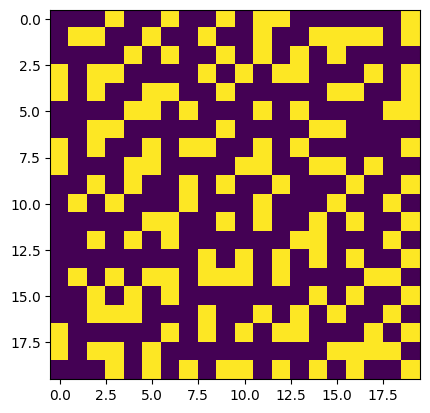

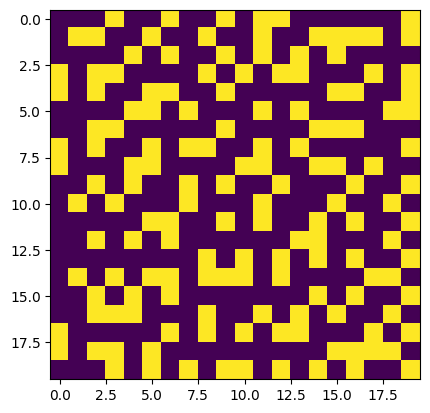

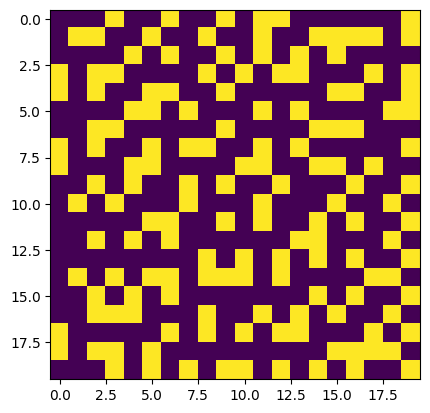

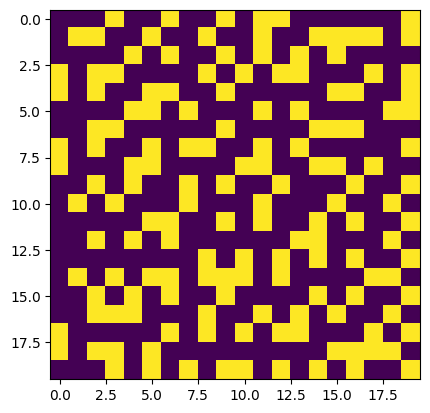

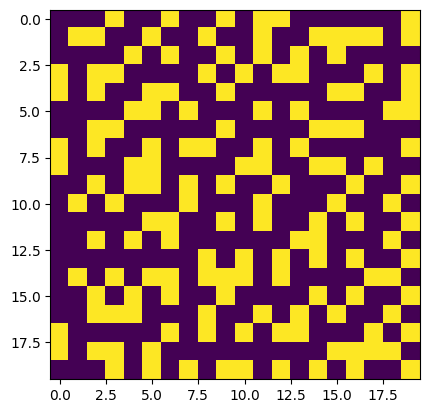

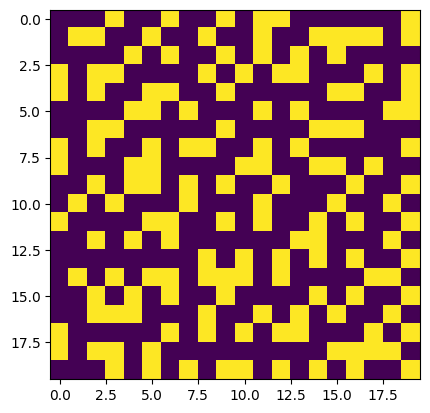

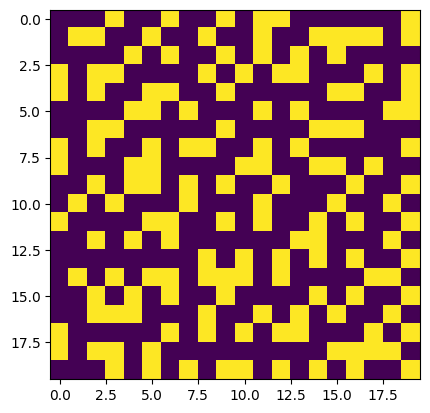

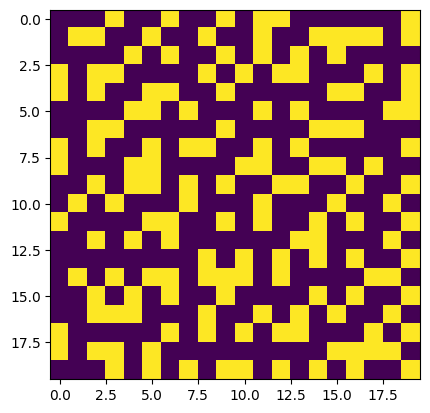

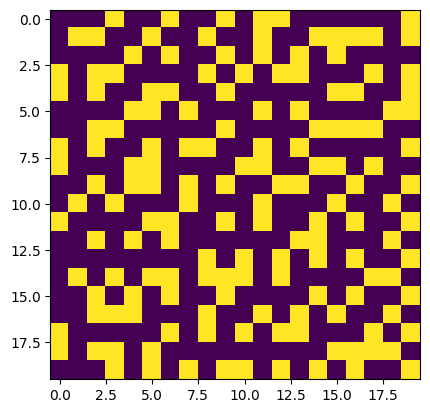

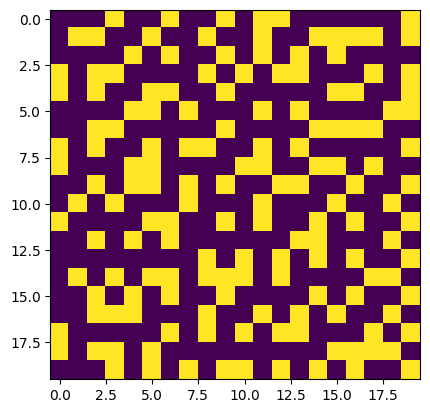

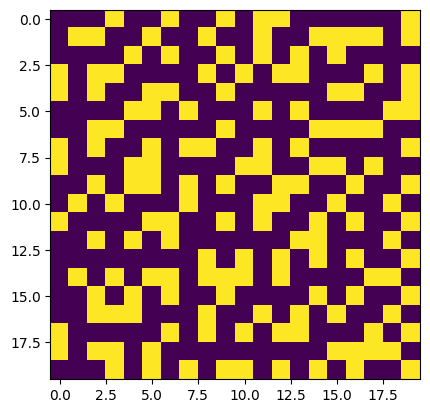

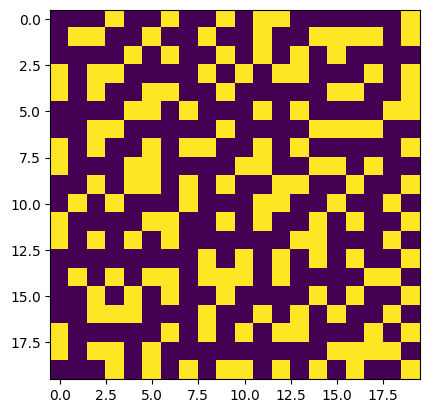

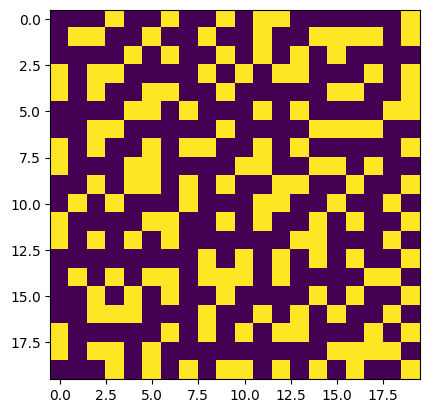

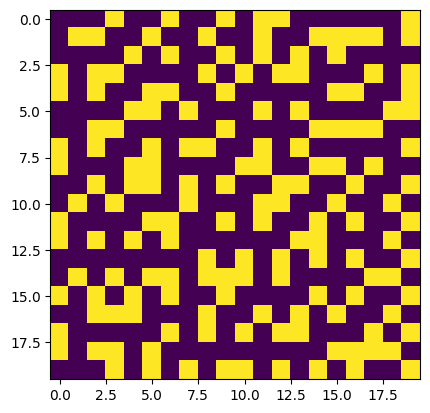

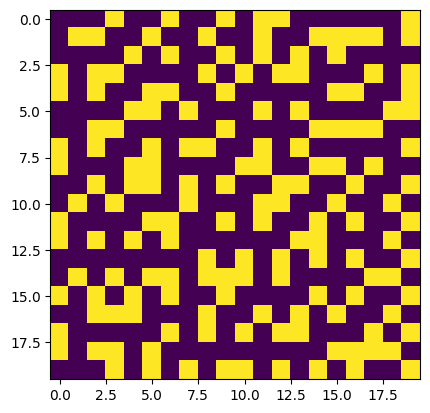

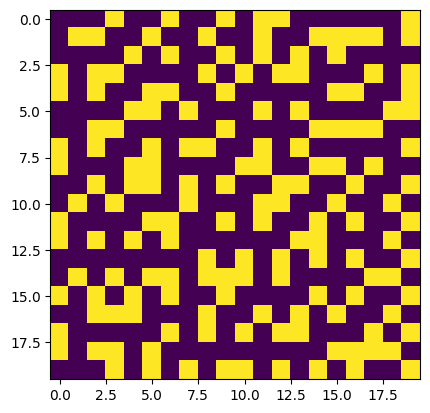

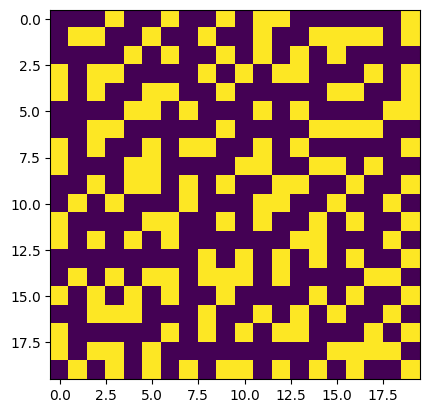

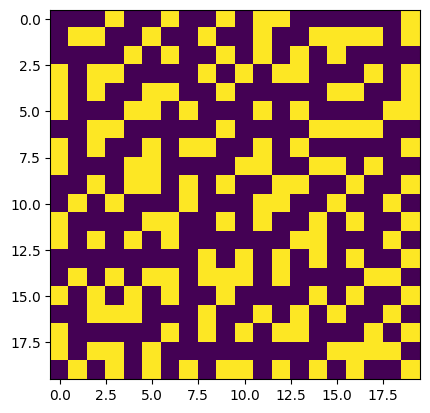

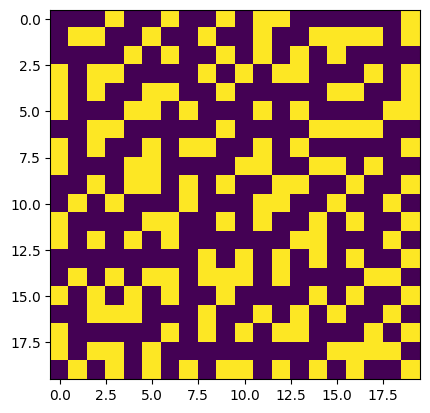

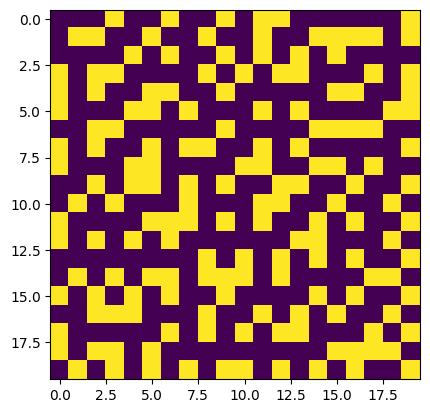

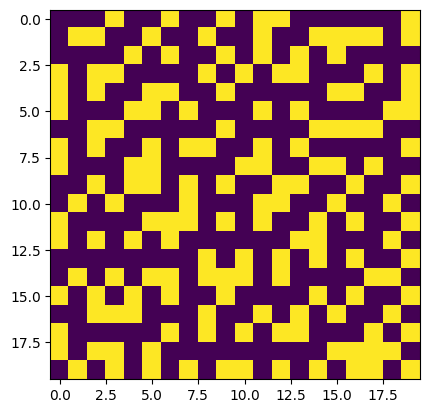

In [115]:
##Esto puede demorar alrededor de un minuto en ejecutar, es para mostrar todos los pasos del proceso,
# intente crear un vídeo pero no lo logré

#for i in realizacionProceso:
#    plt.imshow(i)
#    plt.show()

In [7]:
#idea : hacer video:
#aunque tal vez ejecute mejor en un .py

import cv2

#Generar video:

frameSize = (500, 500)

out = cv2.VideoWriter('output_video.avi',cv2.VideoWriter_fourcc(*'DIVX'), 60, frameSize)

for i in realizacionProceso:
    img = i
    out.write(img)
    plt.imshow(realizacionProceso[i])
    plt.show()

out.release()

TypeError: only integer scalar arrays can be converted to a scalar index